# Second Project: Penguin Data Analysis
### Groupmate: Ziyun Zhou, Zheyan Li, Ge Li

## Load Data & Check Missing Value

In [1]:
# import all the packges we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize": (12,8), "figure.dpi" : 300})

#PCA
from sklearn.decomposition import PCA
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.palettes import Spectral10, Category10

# Logistic
from scipy.special import softmax
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from bokeh.transform import factor_cmap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# SVM
from numpy.random import default_rng
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import CategoricalColorMapper
from sklearn.svm import SVC
rng = default_rng(5)

output_notebook() #see the plot right in notebook

Loading BokehJS ...

In [2]:
df = pd.read_csv('penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2011/11/7,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2011/11/7,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
# extract useful Columns
data = df.iloc[:,[2,4,7,9,10,11,12,13,14,15]]
print(data.shape)
print(list(data.columns))
data.head()

(344, 10)
['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']


,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


In [4]:
# Check the data types
data.dtypes #we need turn object into int to build our model

Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

\
**Data Discription:**

The data set that we used comes from [Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data). 

This data set is the combine data for 3 penguin species: Adélie penguins, Gentoo penguins, Chinstrap penguins. We use the file ```penguins_lter.csv```, which have 344 samples and 17 features. We choose 10 out of 17 features to begin our analysis. Our goal is to built a classifier which could predict the species of a penguin using those features.

```y```:\
**Species**: the species of the penguin (0: Adélie penguins, 1: Gentoo penguins, 2: Chinstrap penguins).

```X```:
1. **Island**: the island near Palmer Station where samples were collected (Biscoe, Dream, Torgersen)
2. **Clutch Completion**: the study nest observed with a full clutch (1: Yes, 0: No)
3. **Culmen Length (mm)**: the length of the dorsal ridge of a bird's bill
4. **Culmen Depth (mm)**: the depth of the dorsal ridge of a bird's bill
5. **Flipper Length (mm)**: the length of penguin flipper
6. **Body Mass (g)**: the penguin body mass
7. **Sex**: the sex of the penguin (1: Male, 0: Female)
8. **Delta 15 N (o/oo)**: the ratio of stable isotopes 15N:14N
9. **Delta 13 C (o/oo)**: the ratio of stable isotopes 13C:12C


In [5]:
# Check NaN value
data.isnull().sum()

Species                 0
Island                  0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [6]:
# print the NAN rows
null_rows = data[data.isnull().any(axis=1)]
print(null_rows)

                                       Species     Island Clutch Completion  \
0          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
3          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
8          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
9          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
10         Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
11         Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
12         Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
13         Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
15         Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
39         Adelie Penguin (Pygoscelis adeliae)      Dream                No   
41         Adelie Penguin (Pygoscelis adeliae)      Dream               Yes   
46         Adelie Penguin (Pygoscelis adeliae)      

In [7]:
# remove all rows with null values
data = data.dropna()
print(data.shape)

(325, 10)


In [8]:
sex_counts = data['Sex'].value_counts()
sex_counts

FEMALE    163
MALE      161
.           1
Name: Sex, dtype: int64

In [9]:
# remove the row which has . in sex column
bad_value = '.'
data = data[data['Sex'] != bad_value]
print(data.shape)

(324, 10)


## Basic Data Analysis

In [10]:
species_counts = data['Species'].value_counts()
species_counts

Adelie Penguin (Pygoscelis adeliae)          139
Gentoo penguin (Pygoscelis papua)            118
Chinstrap penguin (Pygoscelis antarctica)     67
Name: Species, dtype: int64

In [11]:
island_counts = data['Island'].value_counts()
island_counts

Biscoe       162
Dream        119
Torgersen     43
Name: Island, dtype: int64

<Axes: ylabel='Species'>

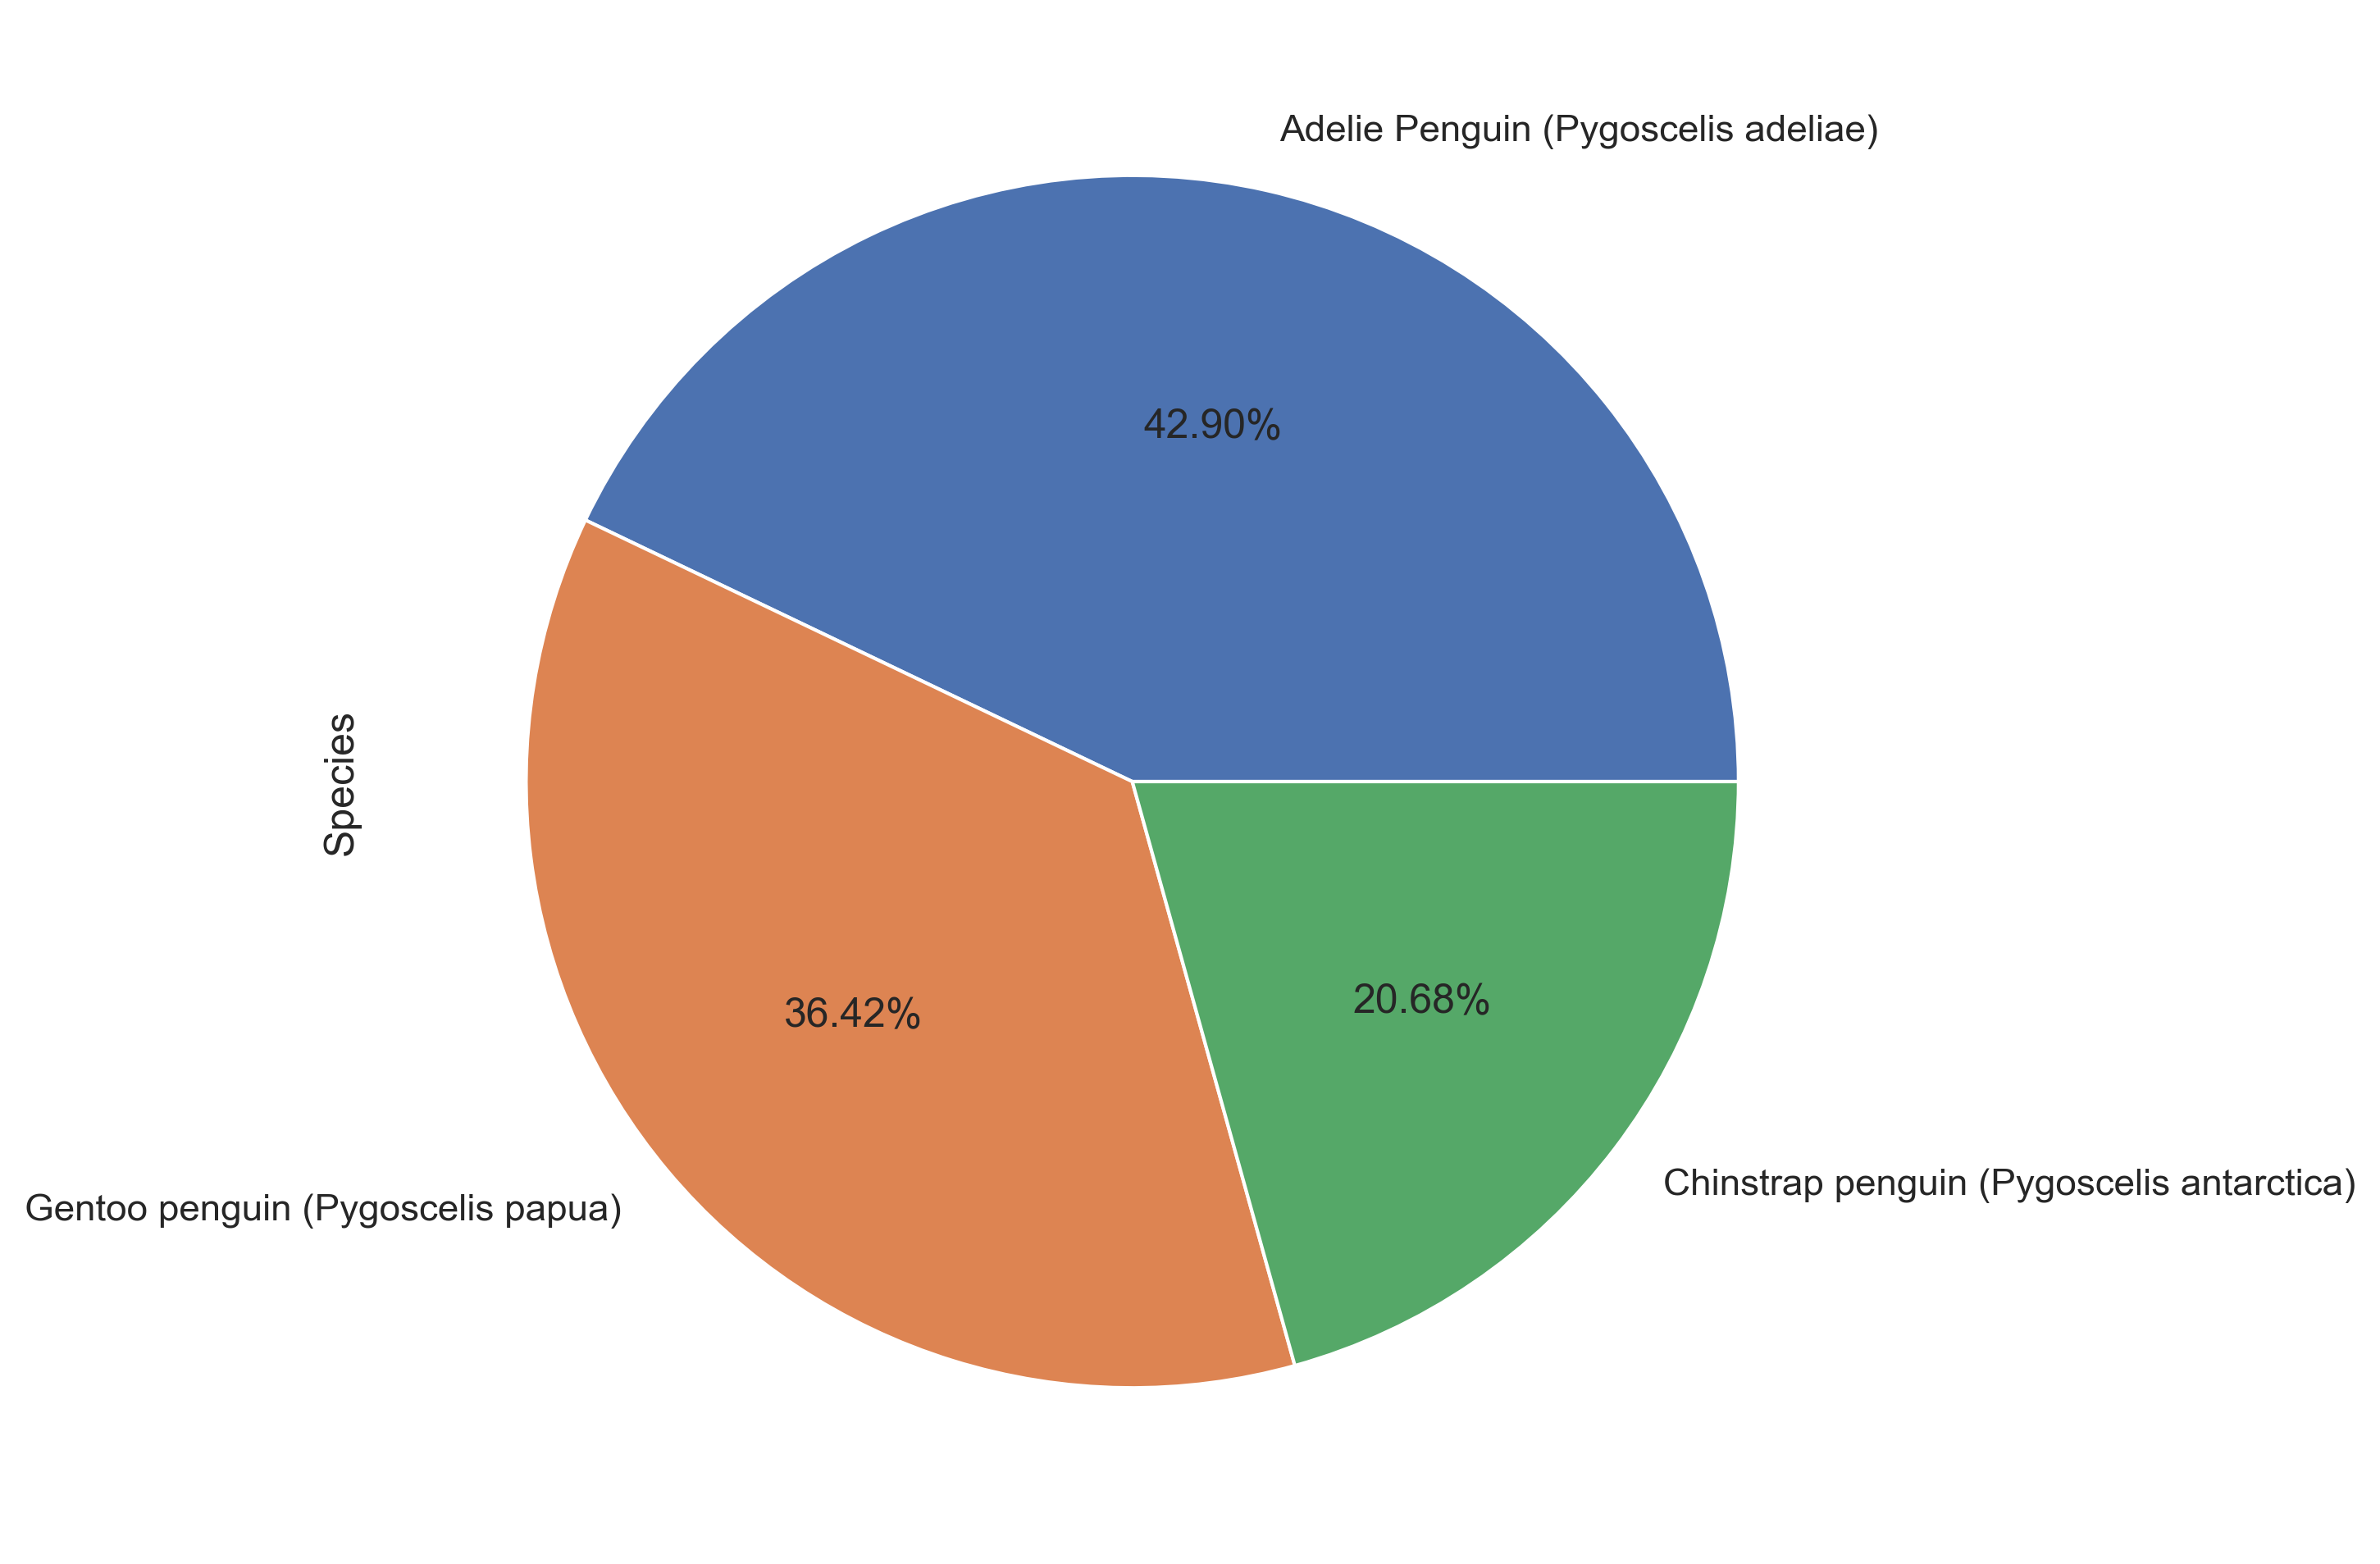

In [12]:
# Look at the categories of the columns with the pie plot
Species = data.Species.value_counts()
Species.plot(kind='pie',autopct="%.2f%%")

<Axes: ylabel='Island'>

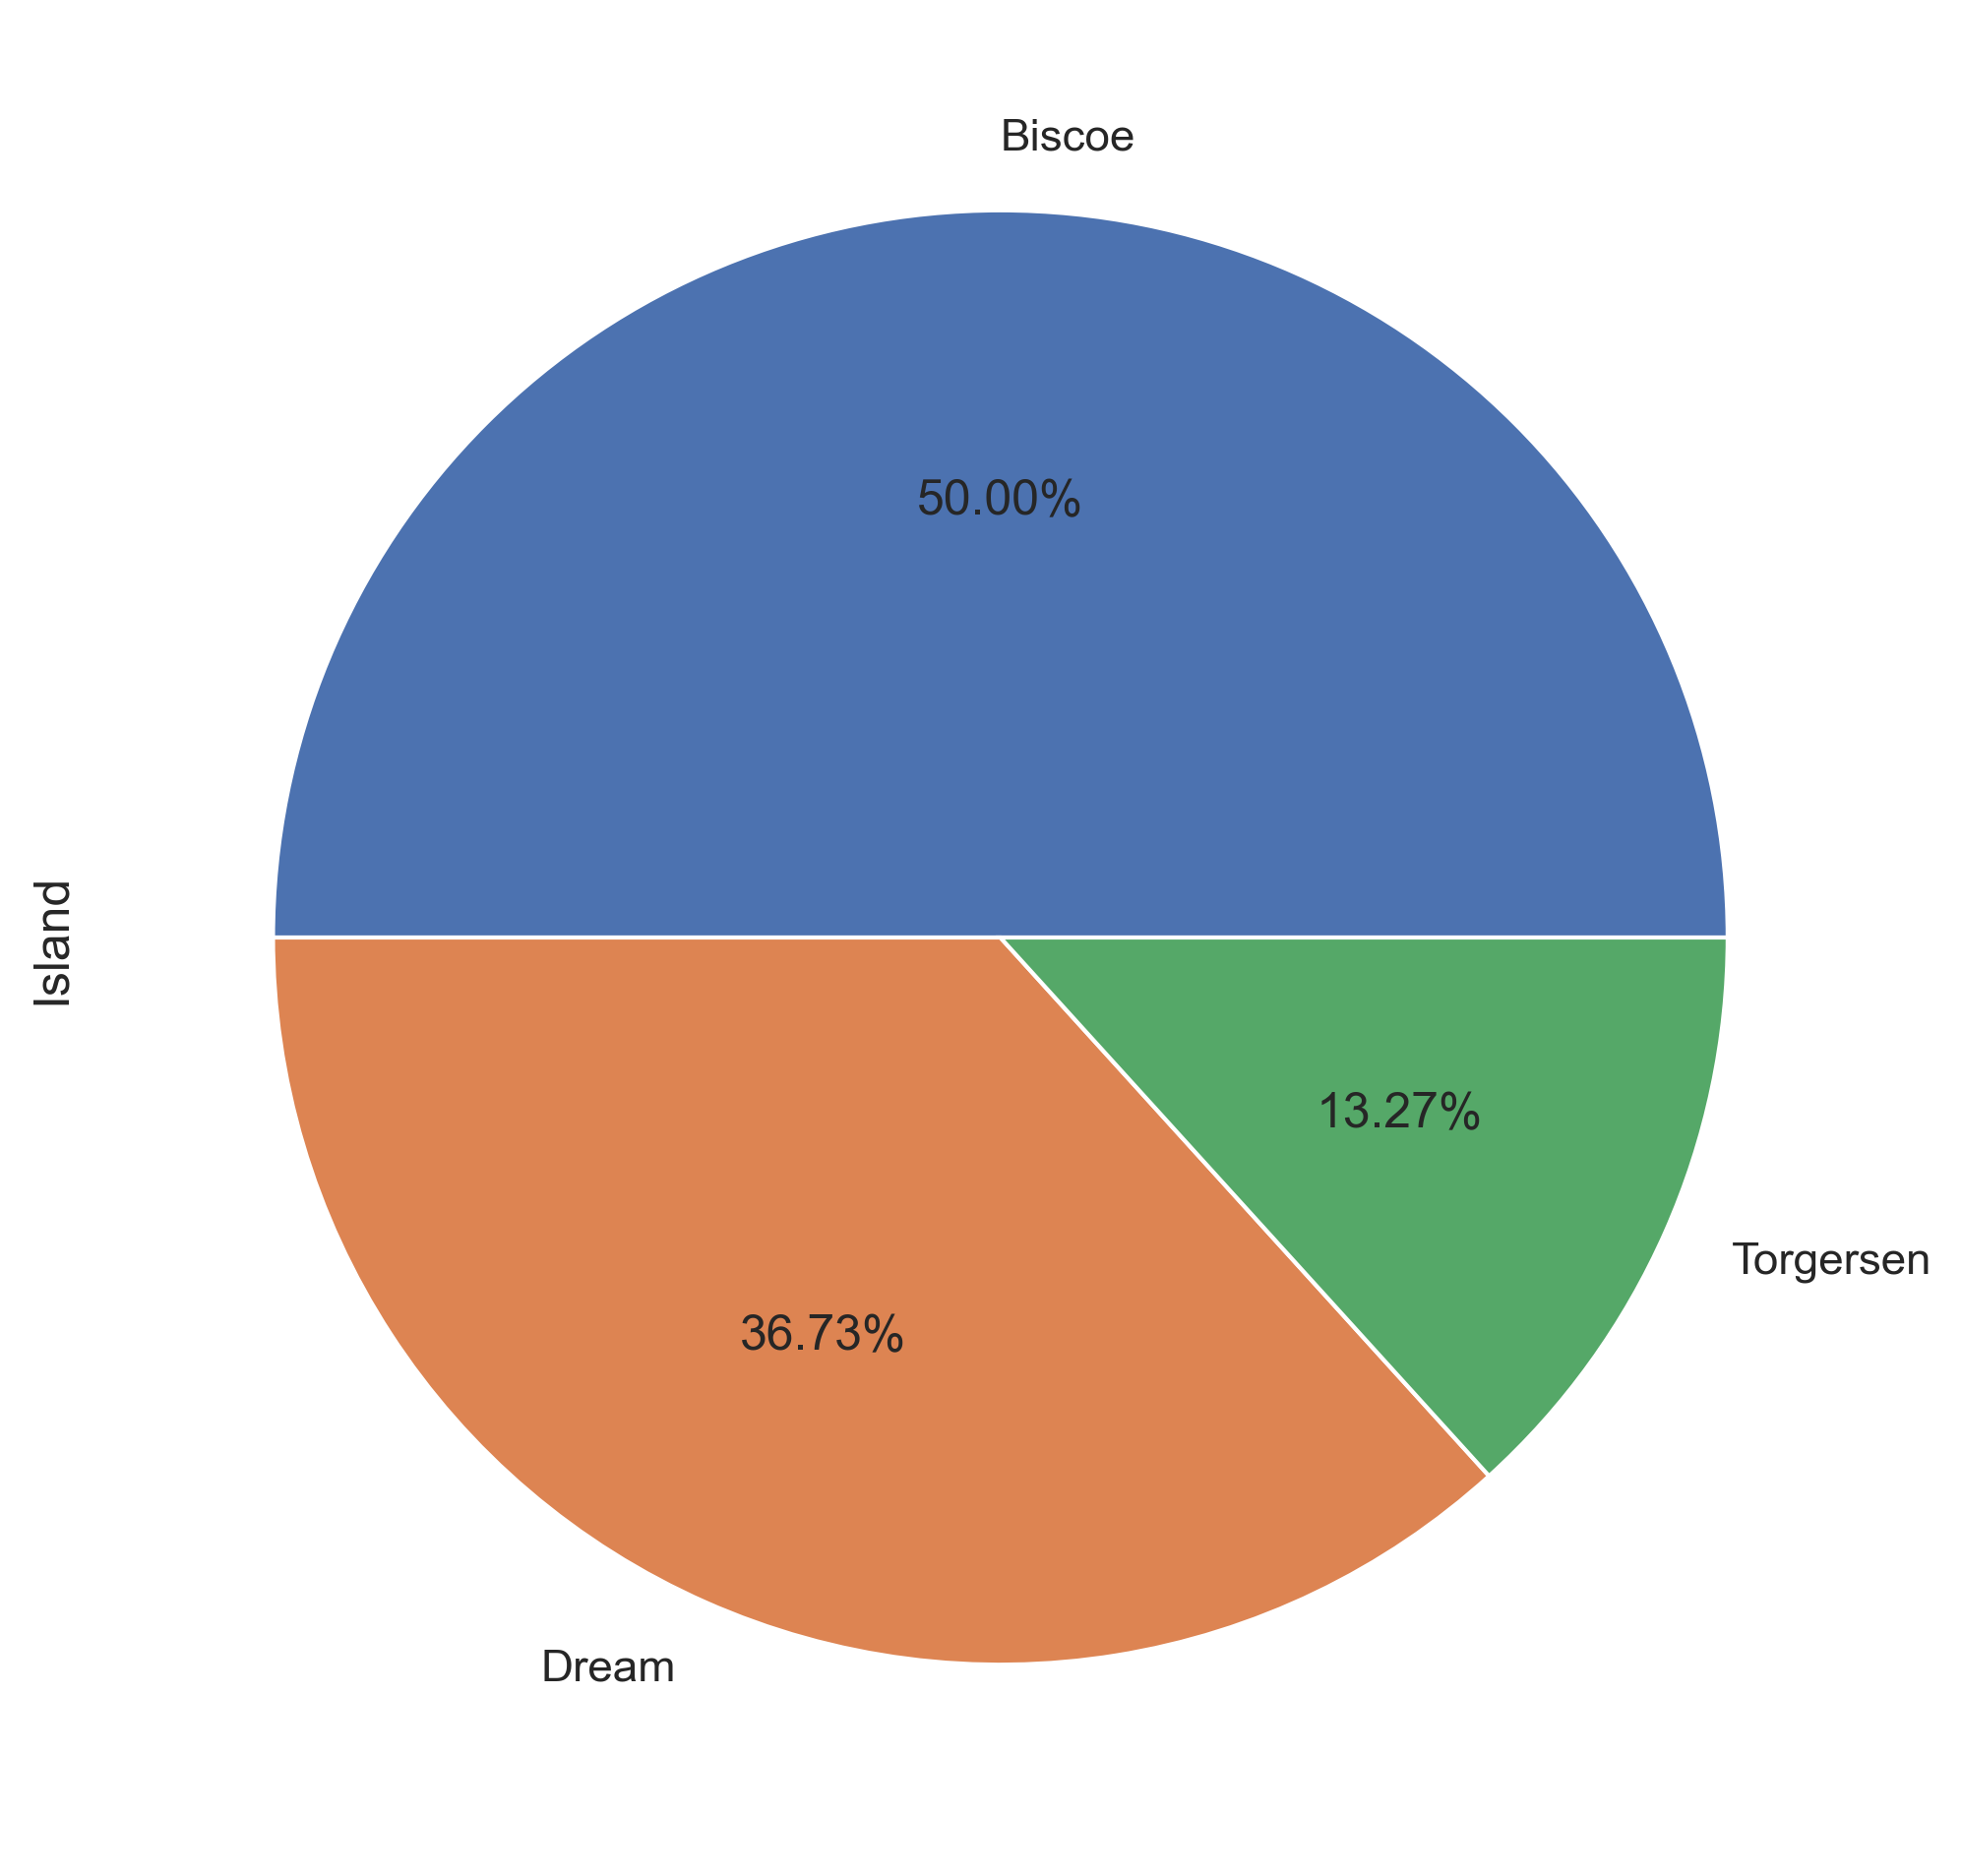

In [13]:
Island = data.Island.value_counts()
Island.plot(kind='pie',autopct="%.2f%%")

<Axes: ylabel='Sex'>

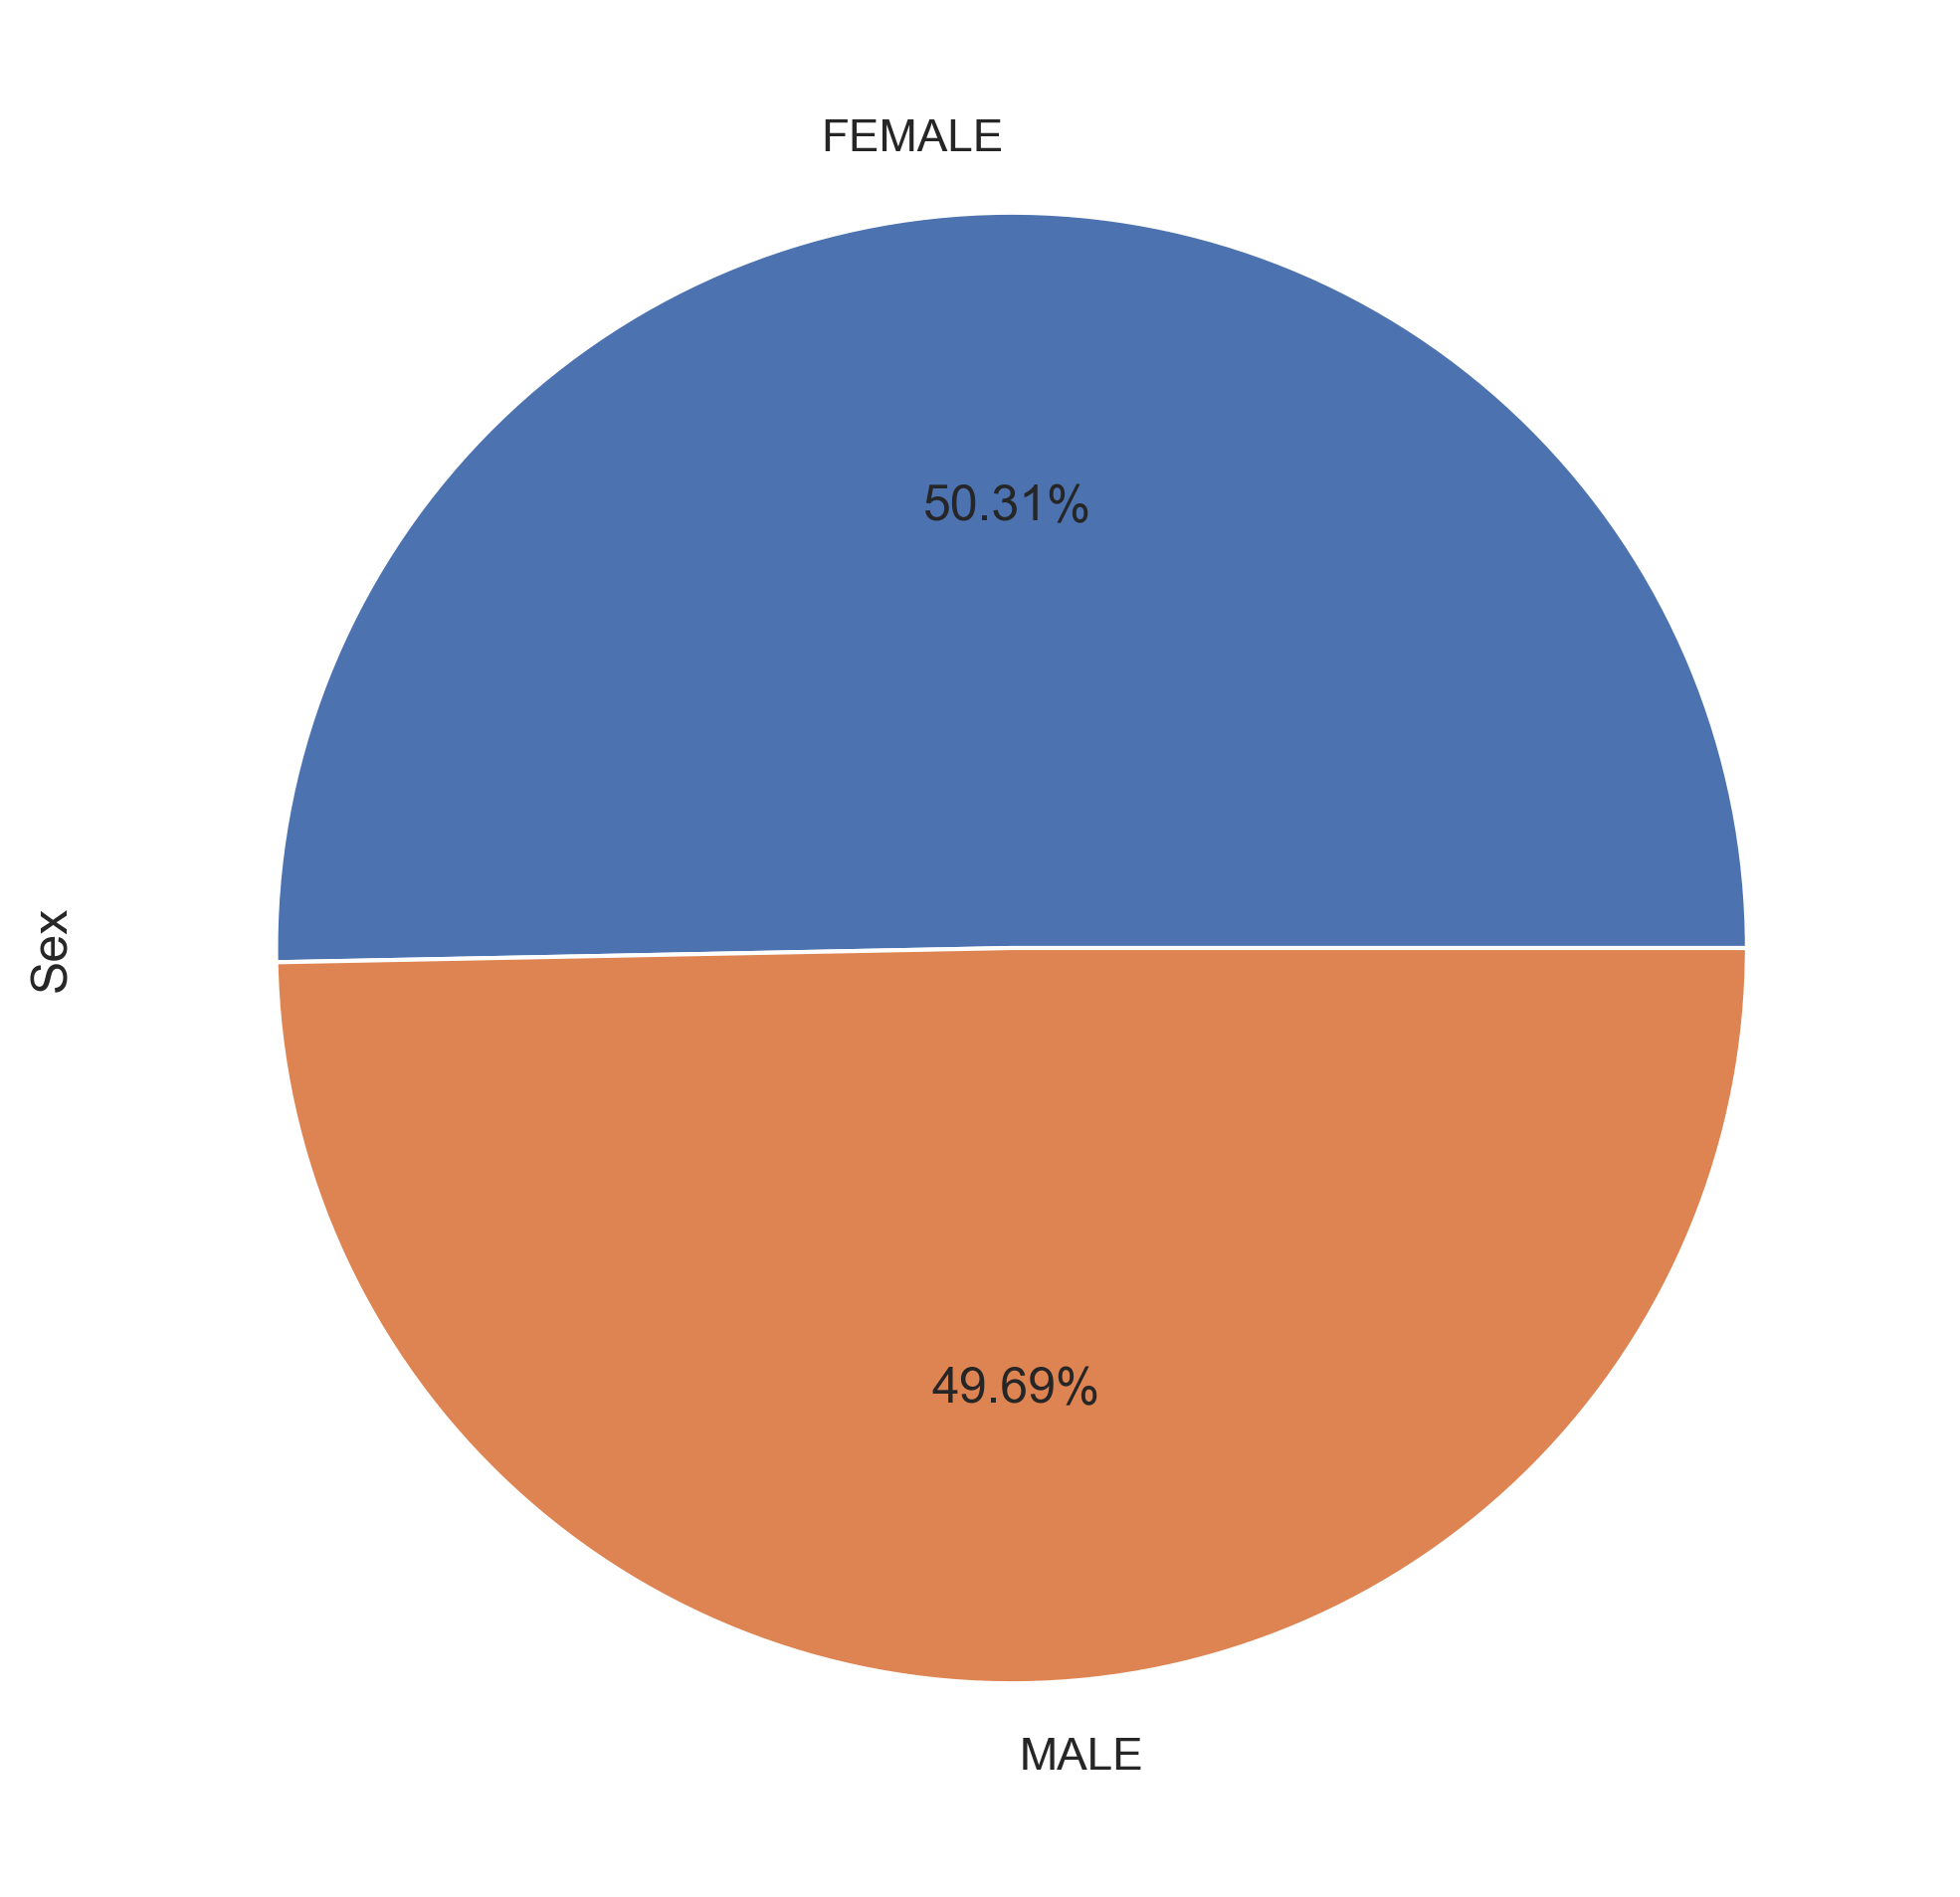

In [14]:
Sex=data.Sex.value_counts()
Sex.plot(kind='pie',autopct="%.2f%%")

In [15]:
# pairplot
#sns.pairplot(df, hue = "species", height=3)

Text(0.5, 1.0, 'Culmen Length (mm)')

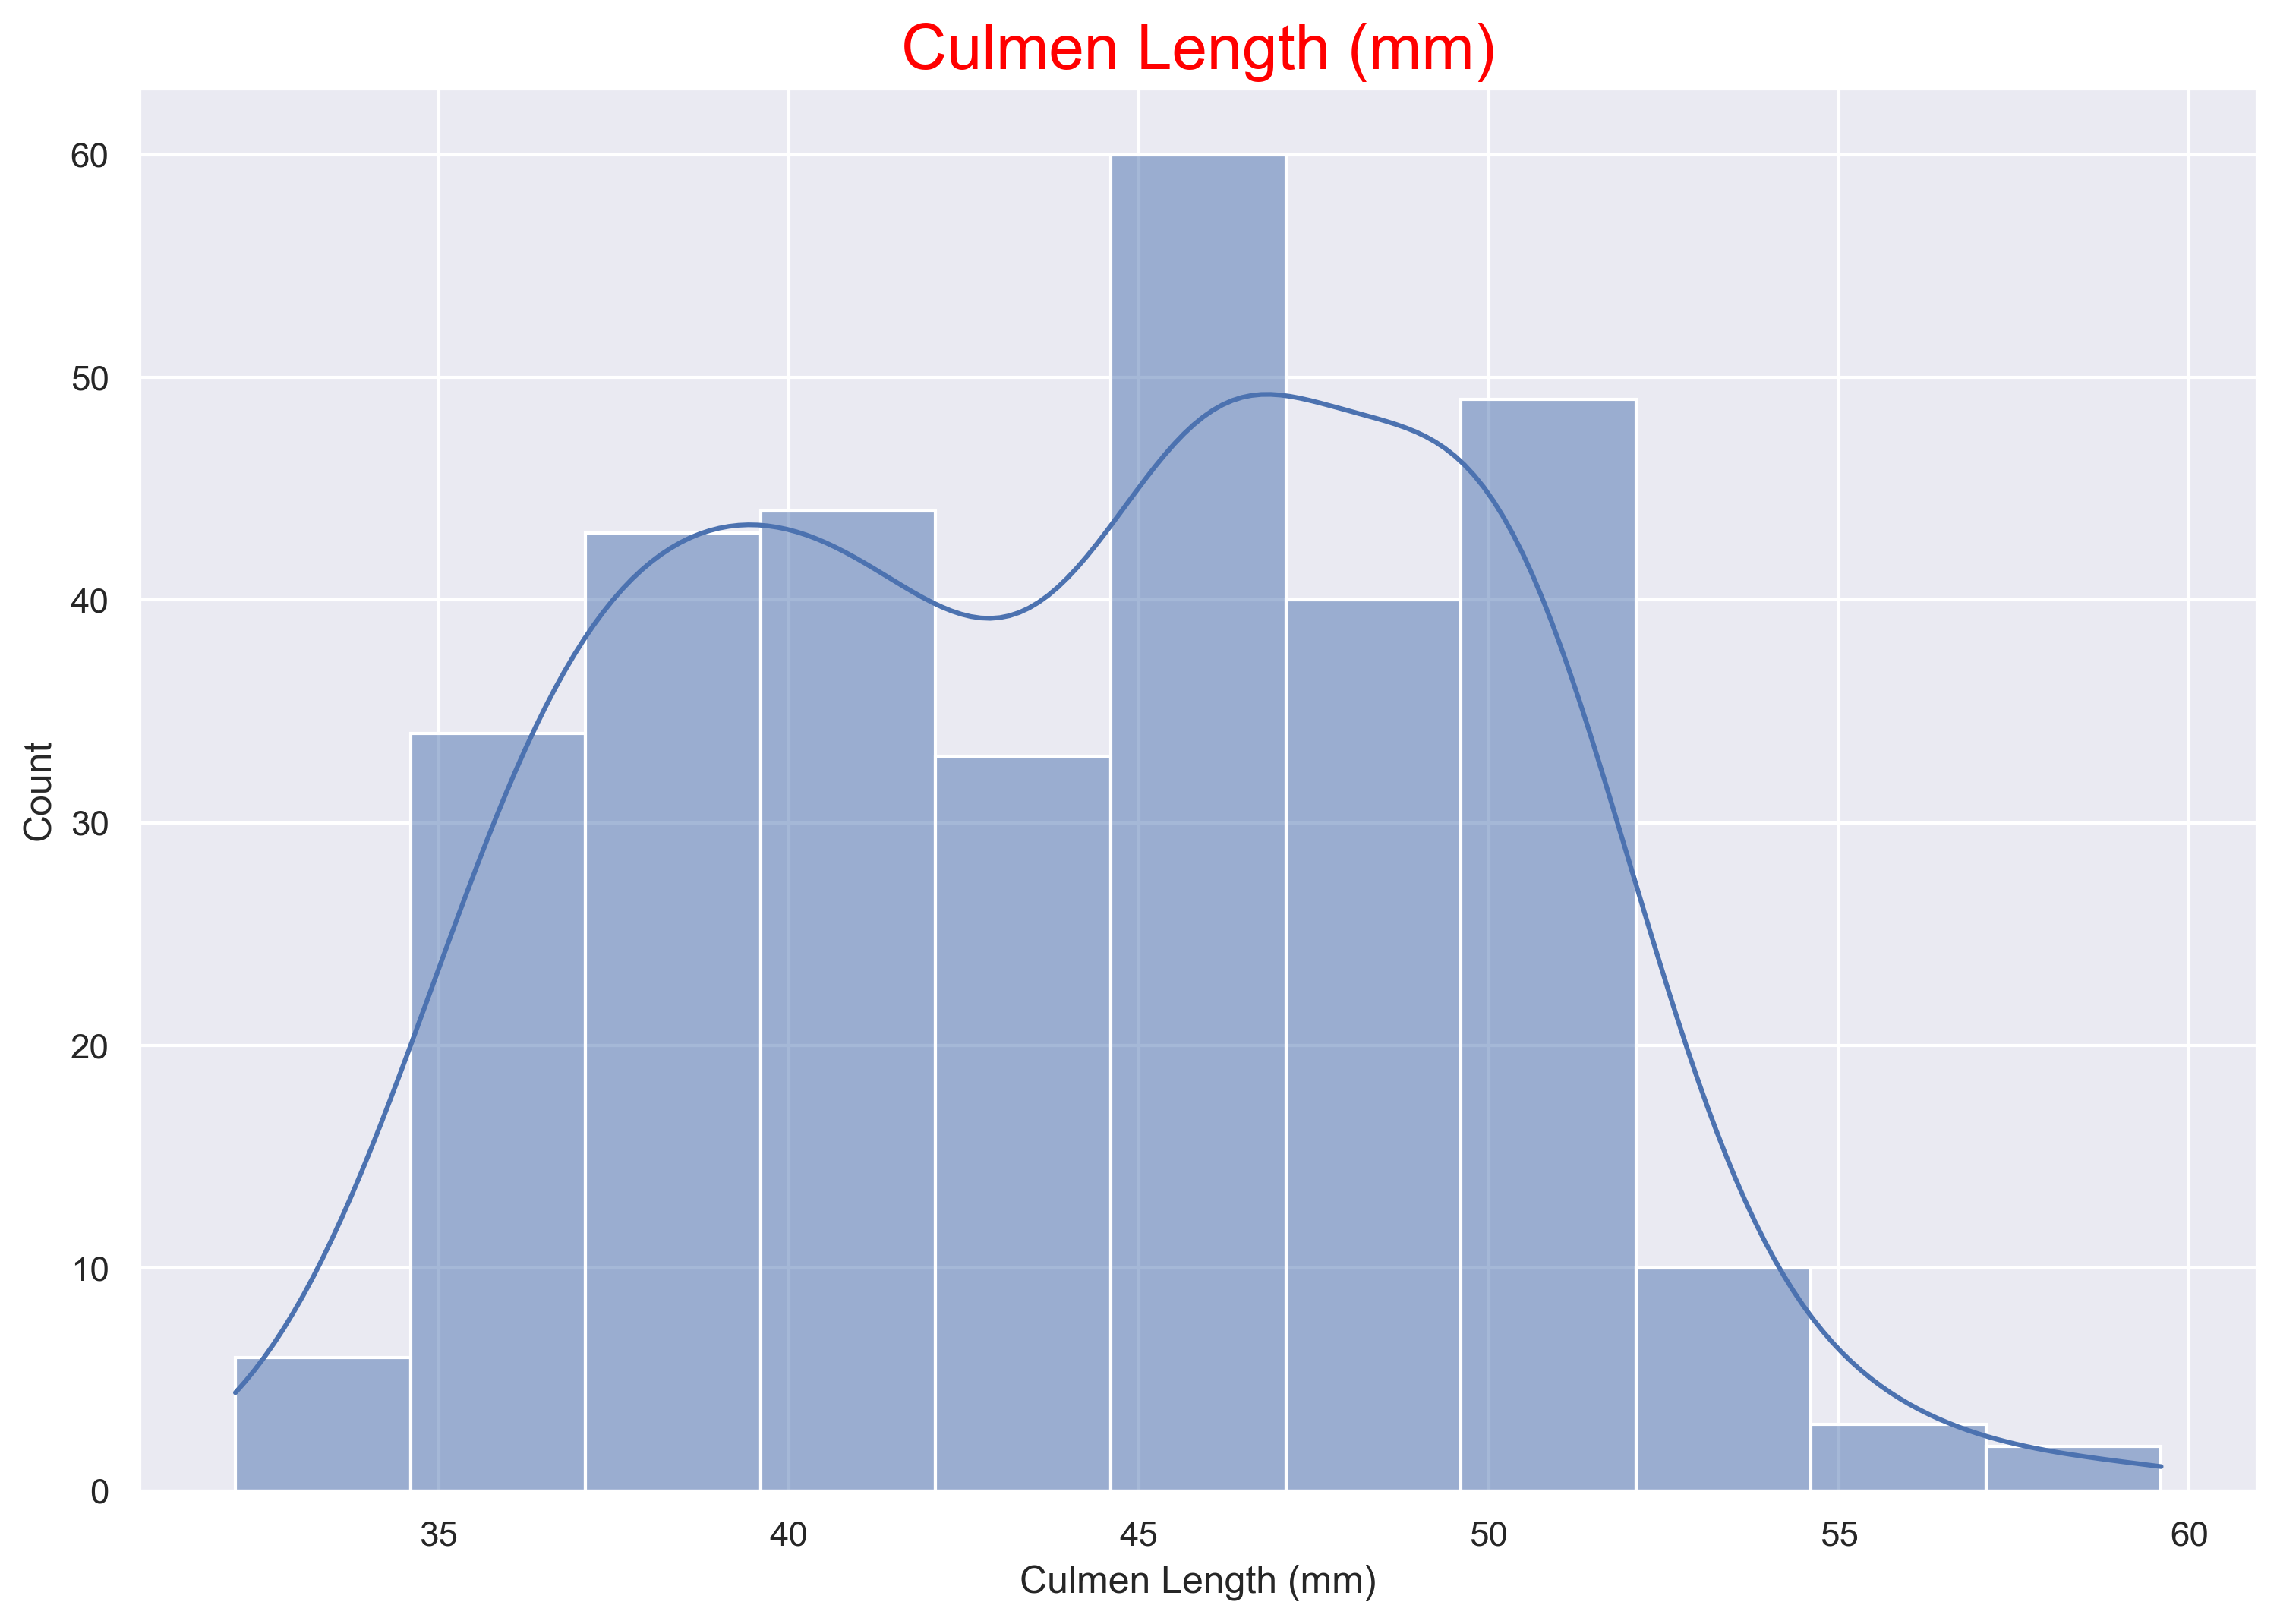

In [16]:
# plot the histgram of Culmen Length (mm)
sns.histplot(x = "Culmen Length (mm)", data = data, kde = True)
plt.title("Culmen Length (mm)", size=20, color="red")

Text(0.5, 1.0, 'Culmen Depth (mm)')

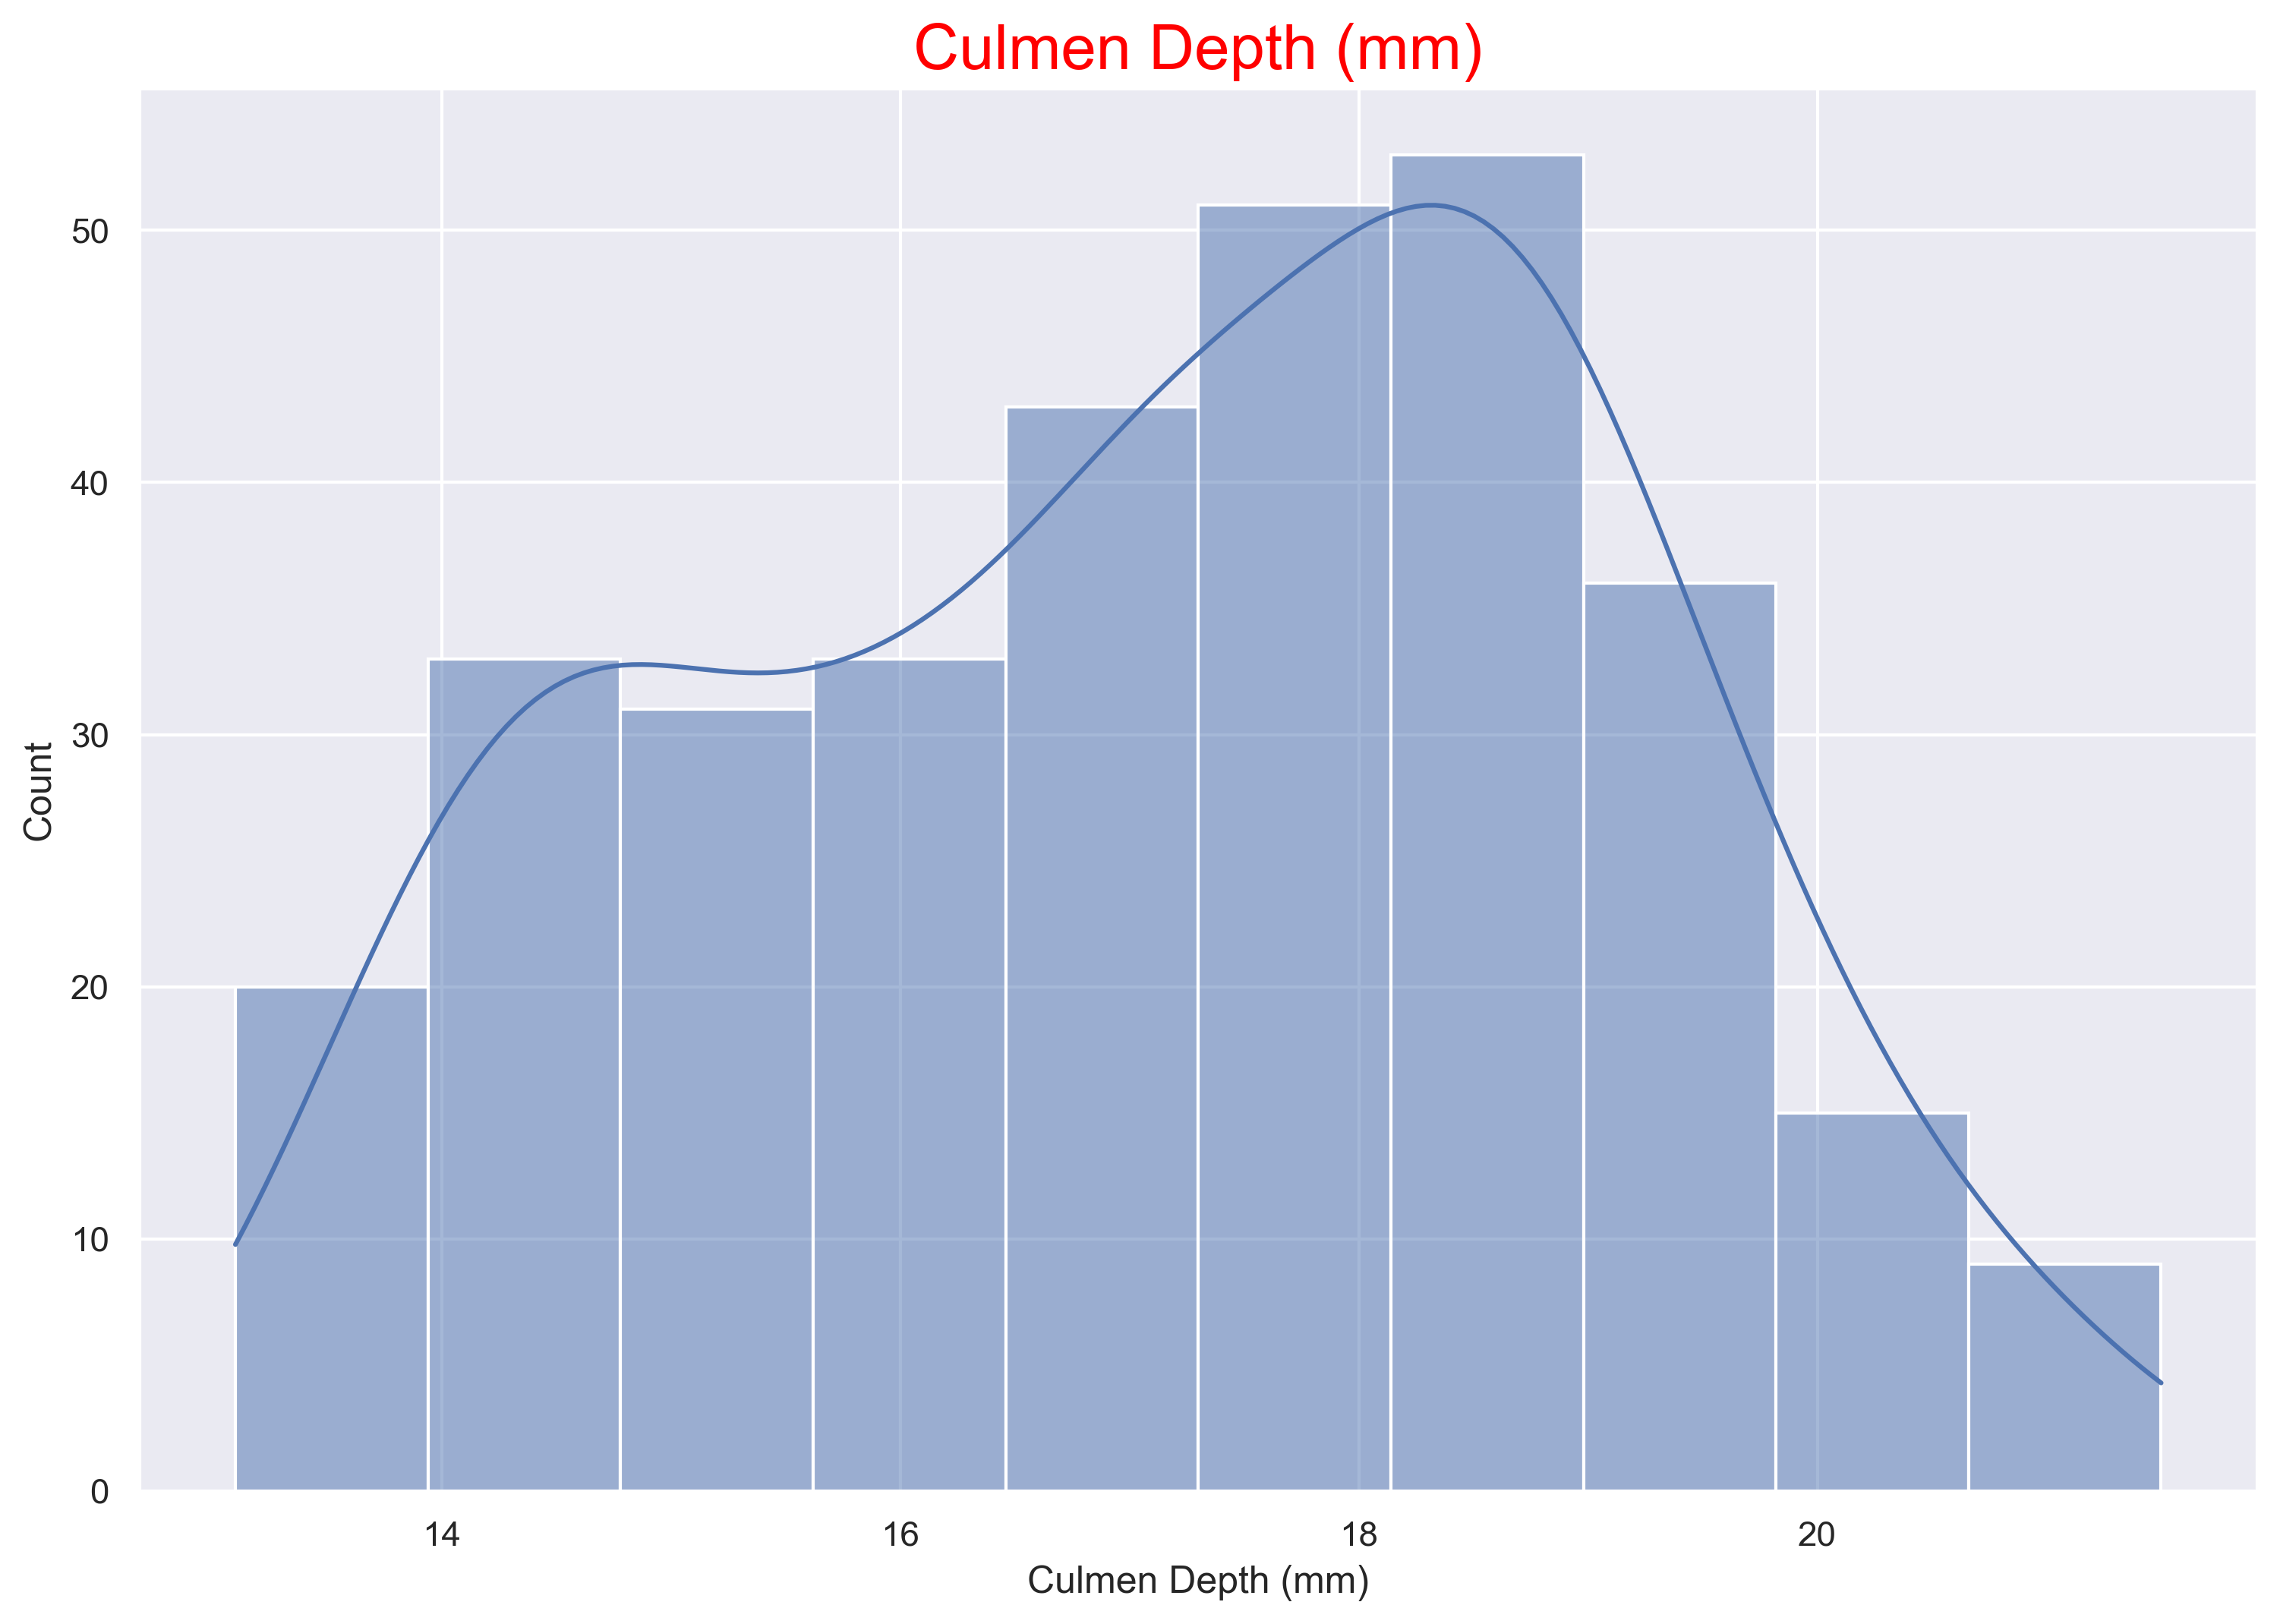

In [17]:
# plot the histgram of Culmen Depth (mm)
sns.histplot(x = "Culmen Depth (mm)", data = data, kde = True)
plt.title("Culmen Depth (mm)", size=20, color="red")

Text(0.5, 1.0, 'Flipper Length (mm)')

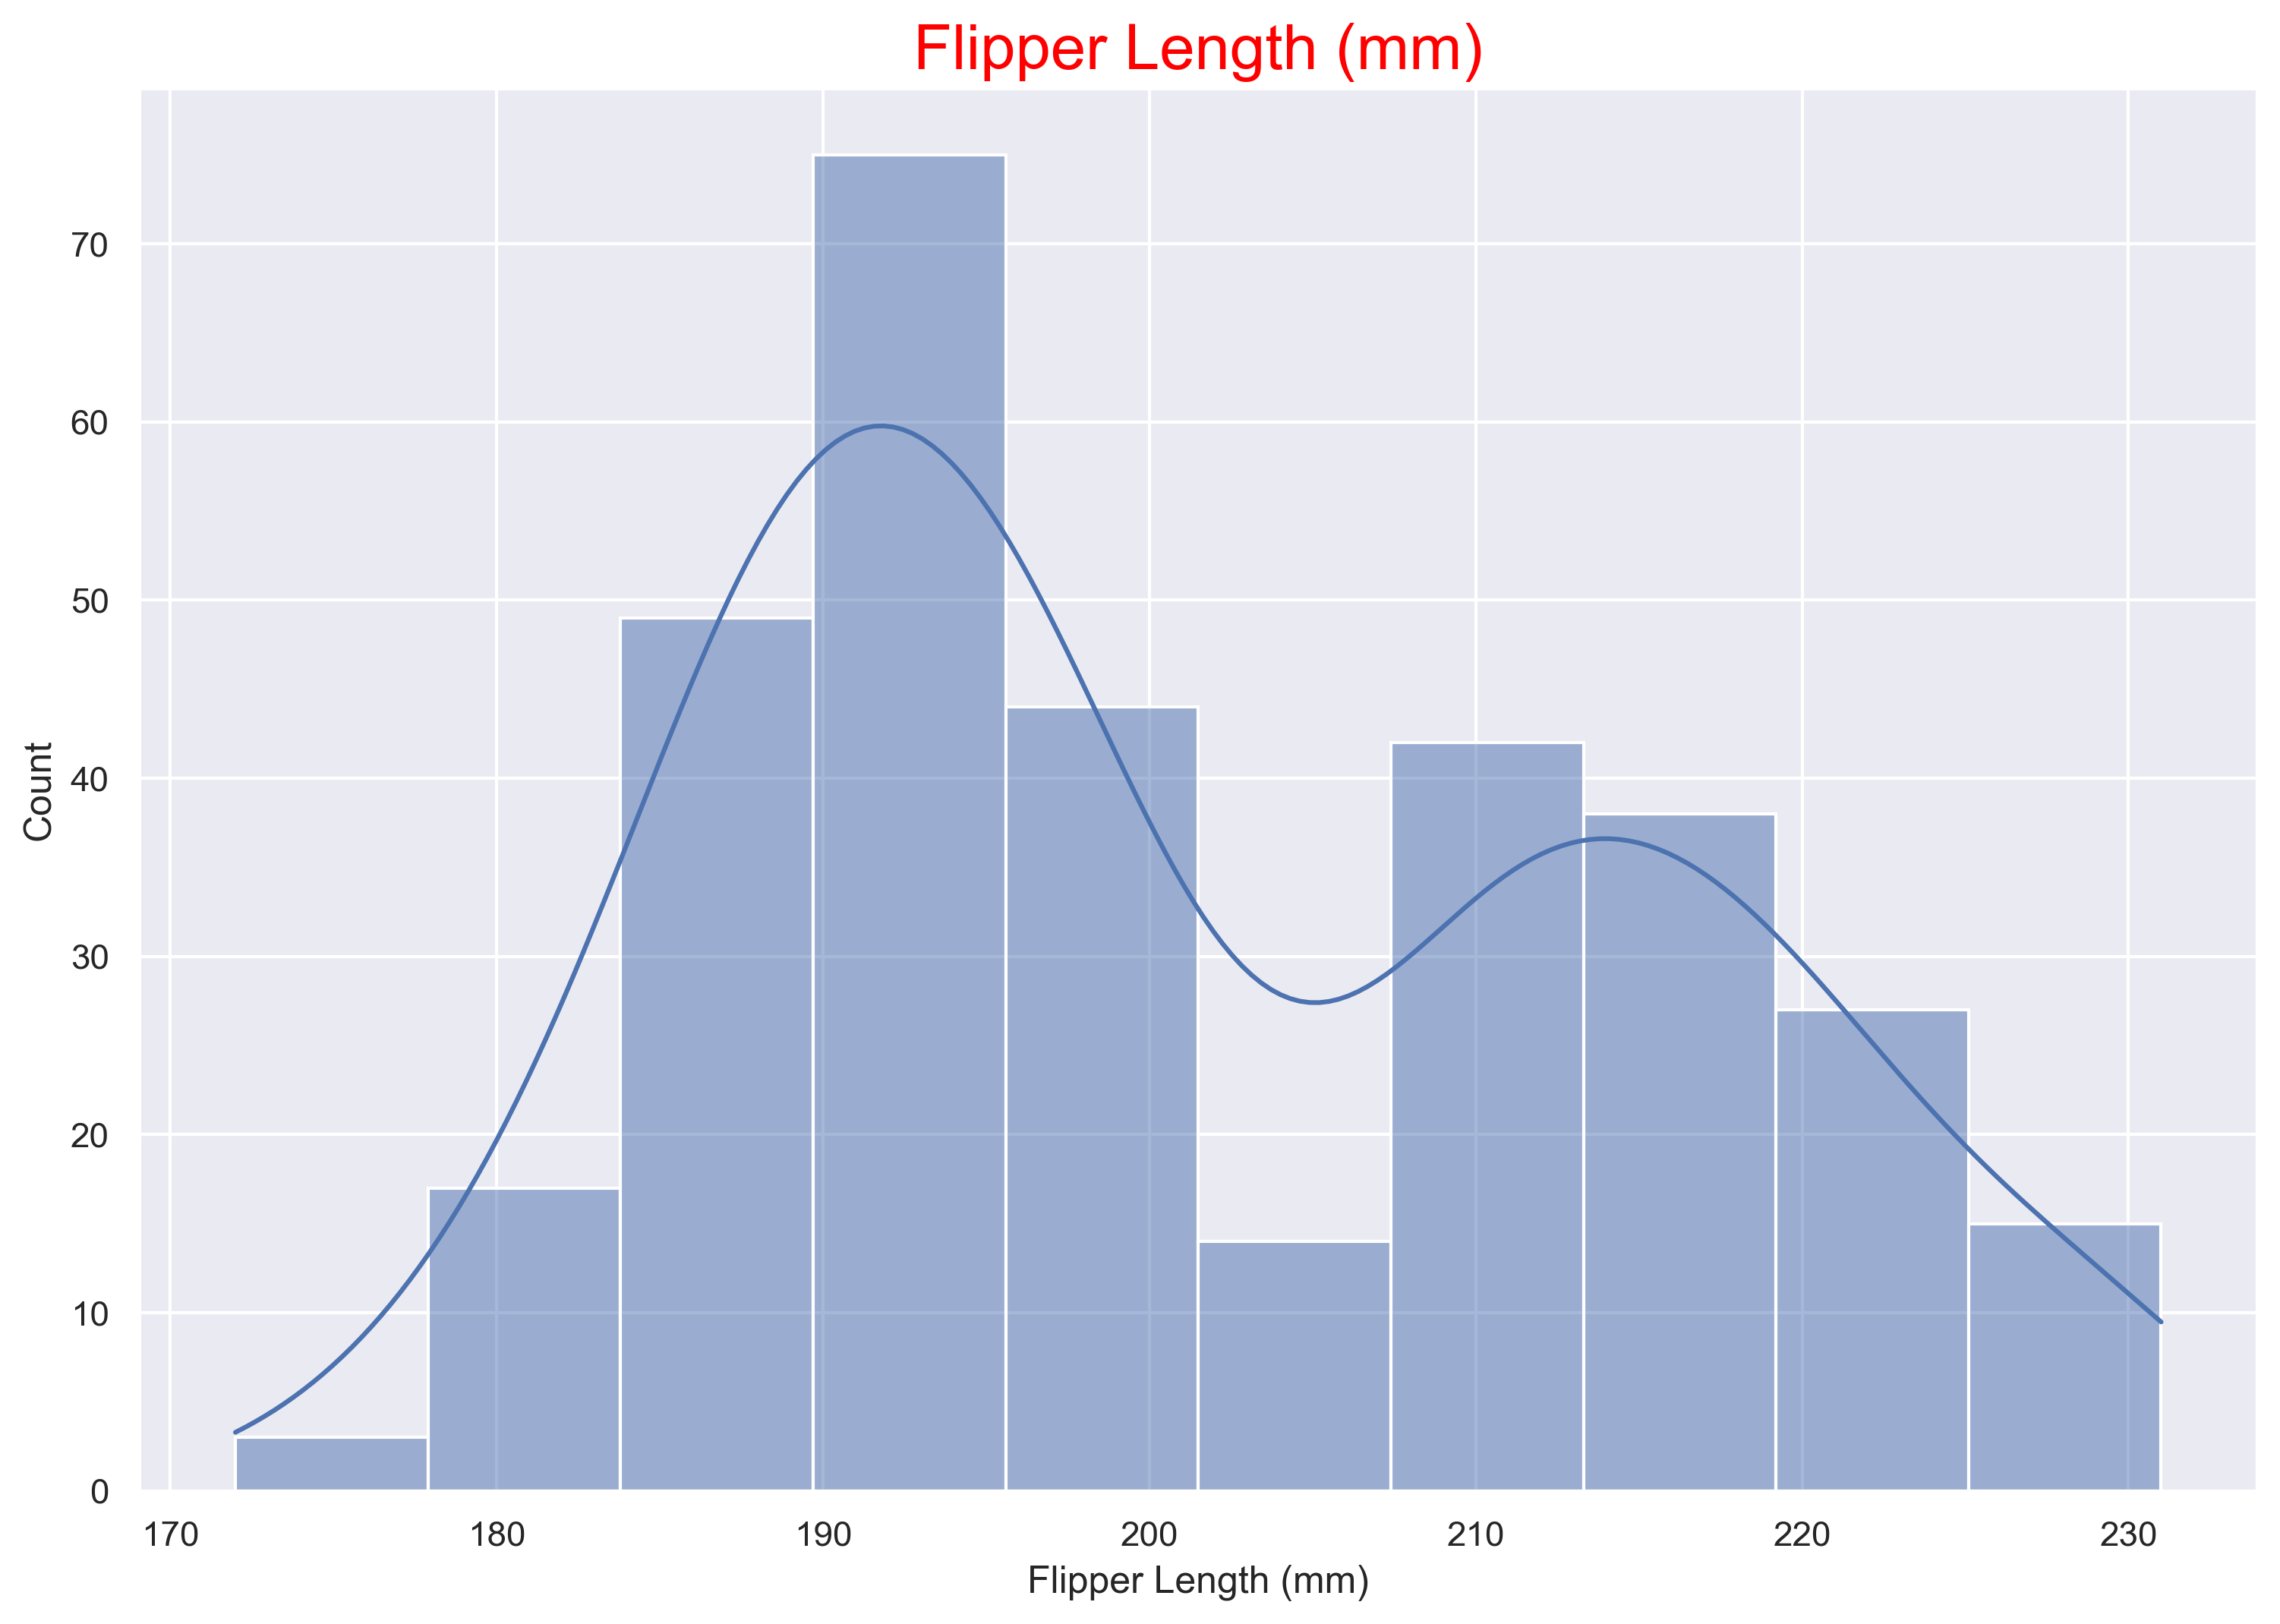

In [18]:
# plot the histgram of Flipper Length (mm)
sns.histplot(x = "Flipper Length (mm)", data = data, kde = True)
plt.title("Flipper Length (mm)", size=20, color="red")

Text(0.5, 1.0, 'Body Mass (g)')

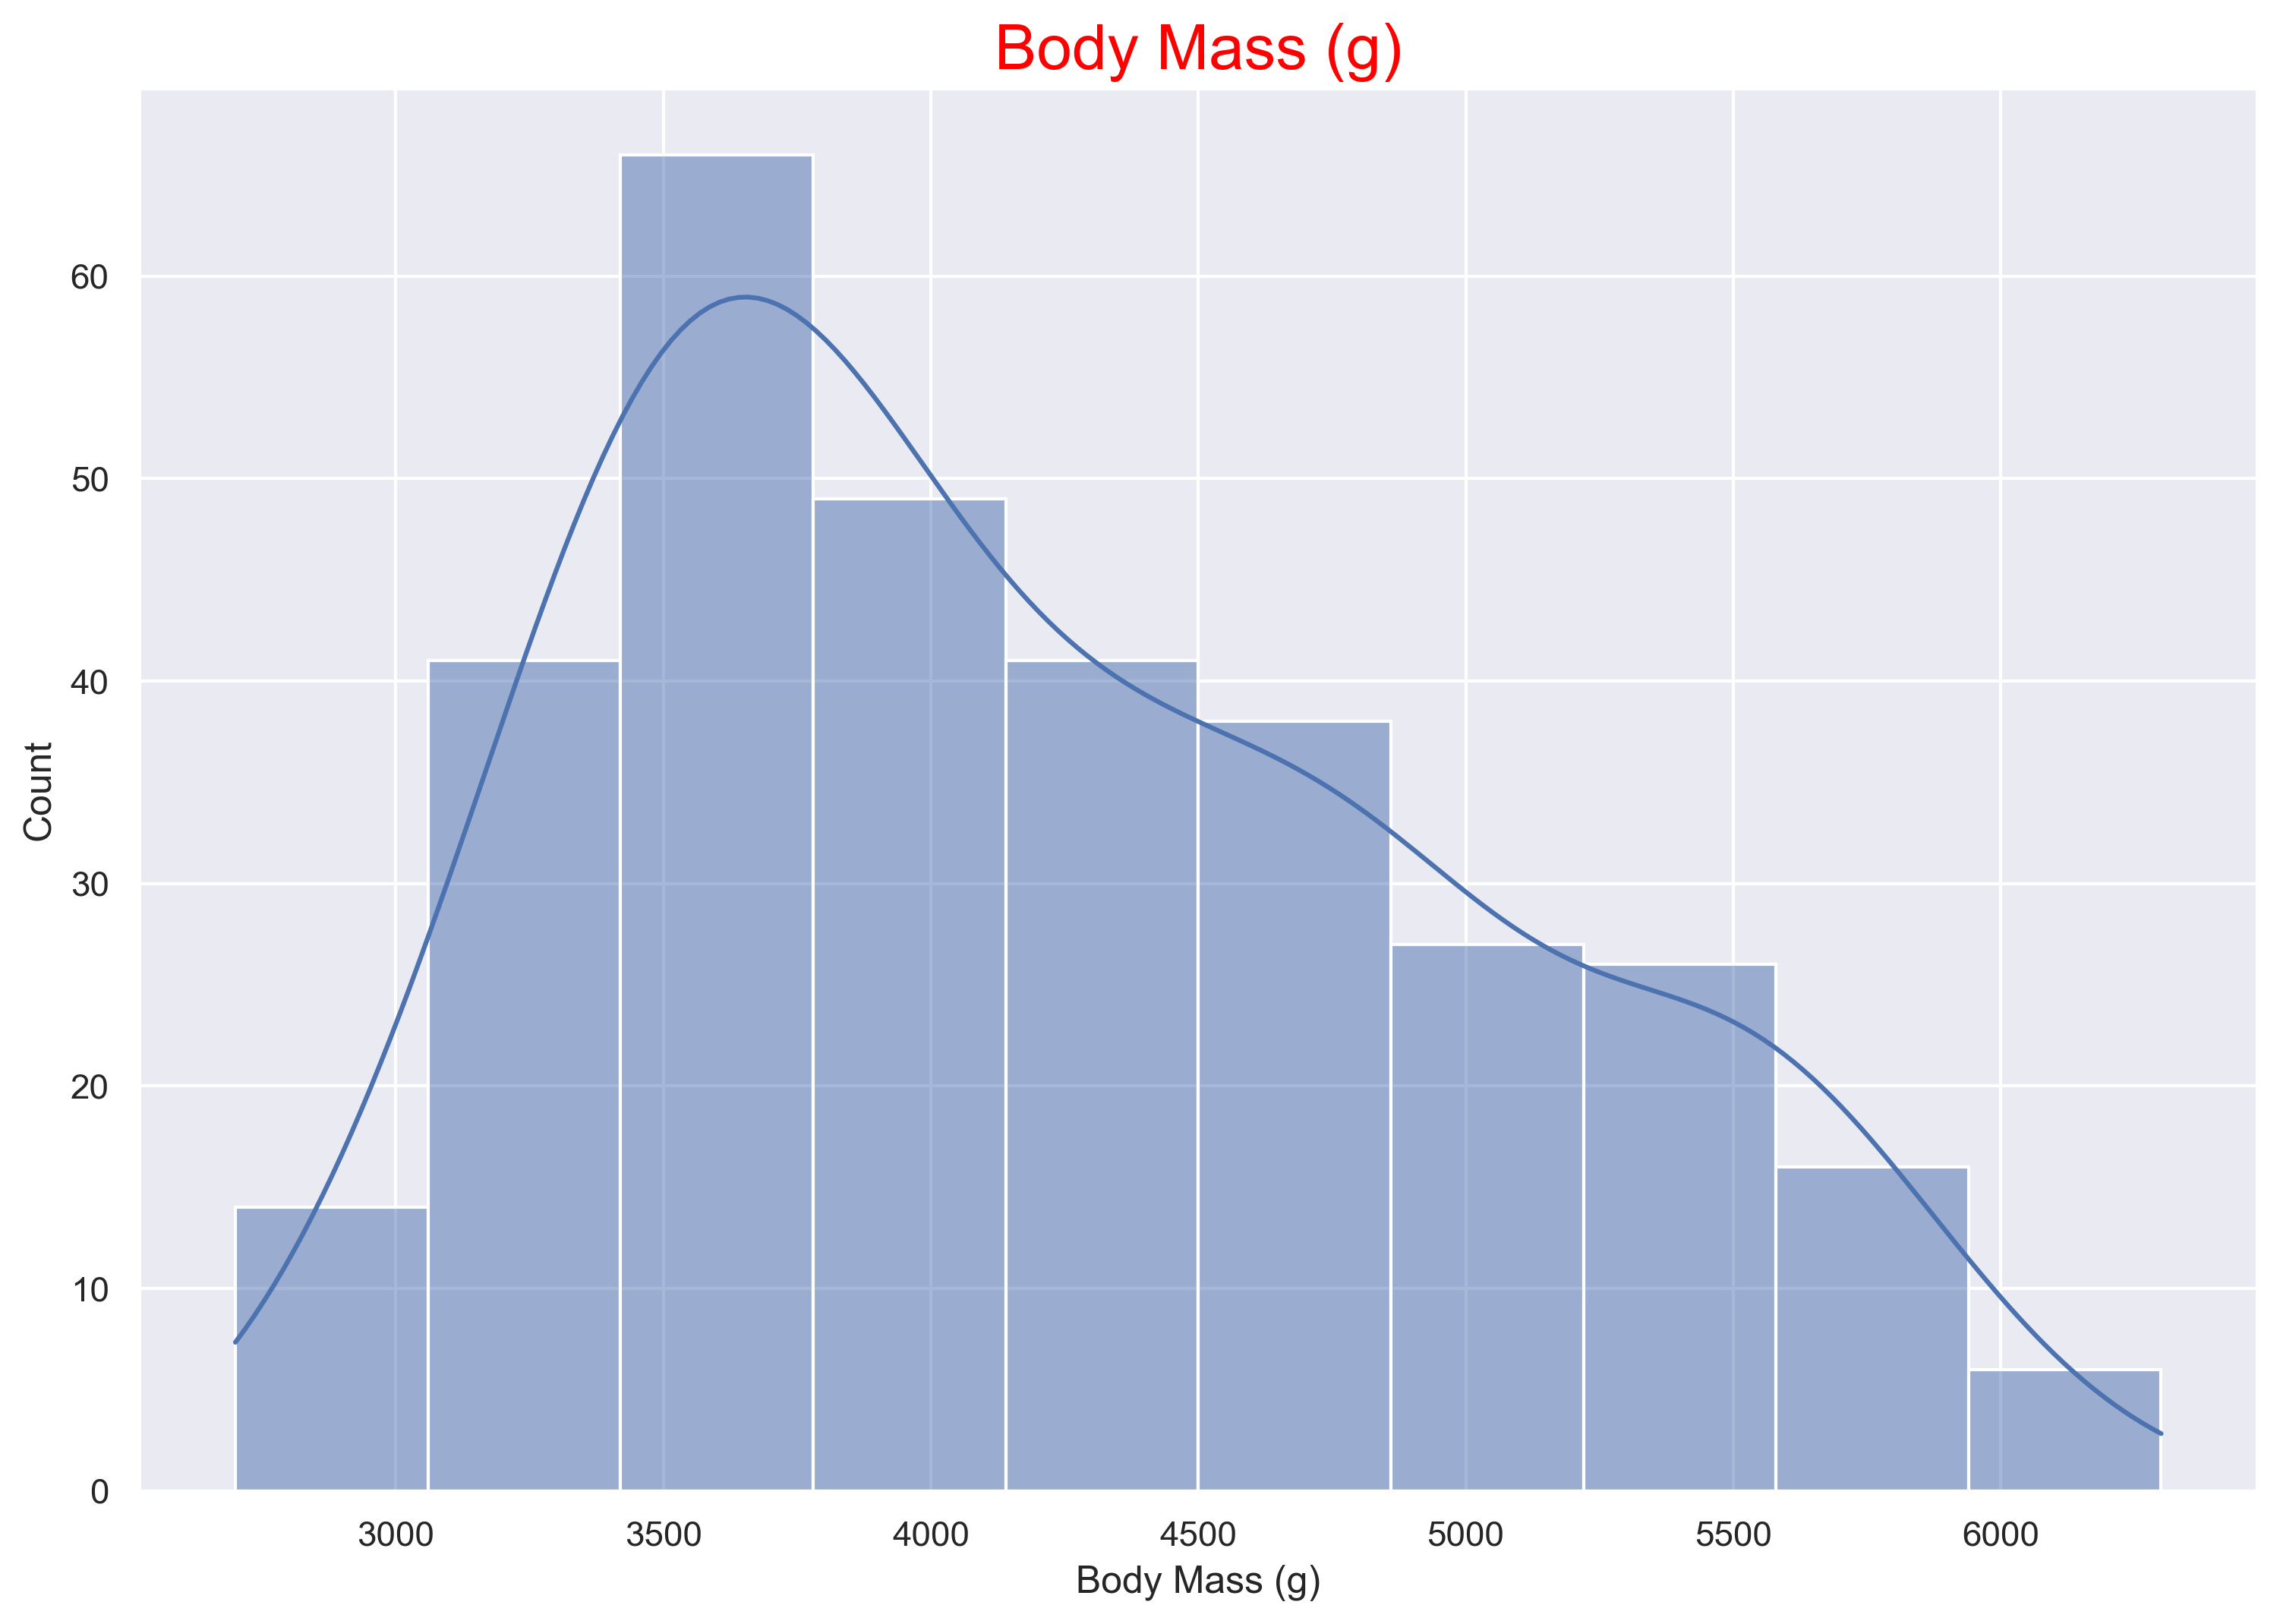

In [19]:
# plot the histgram of Body Mass (g)
sns.histplot(x = "Body Mass (g)", data = data, kde = True)
plt.title("Body Mass (g)", size=20, color="red")

Text(0.5, 1.0, 'Delta 15 N (o/oo)')

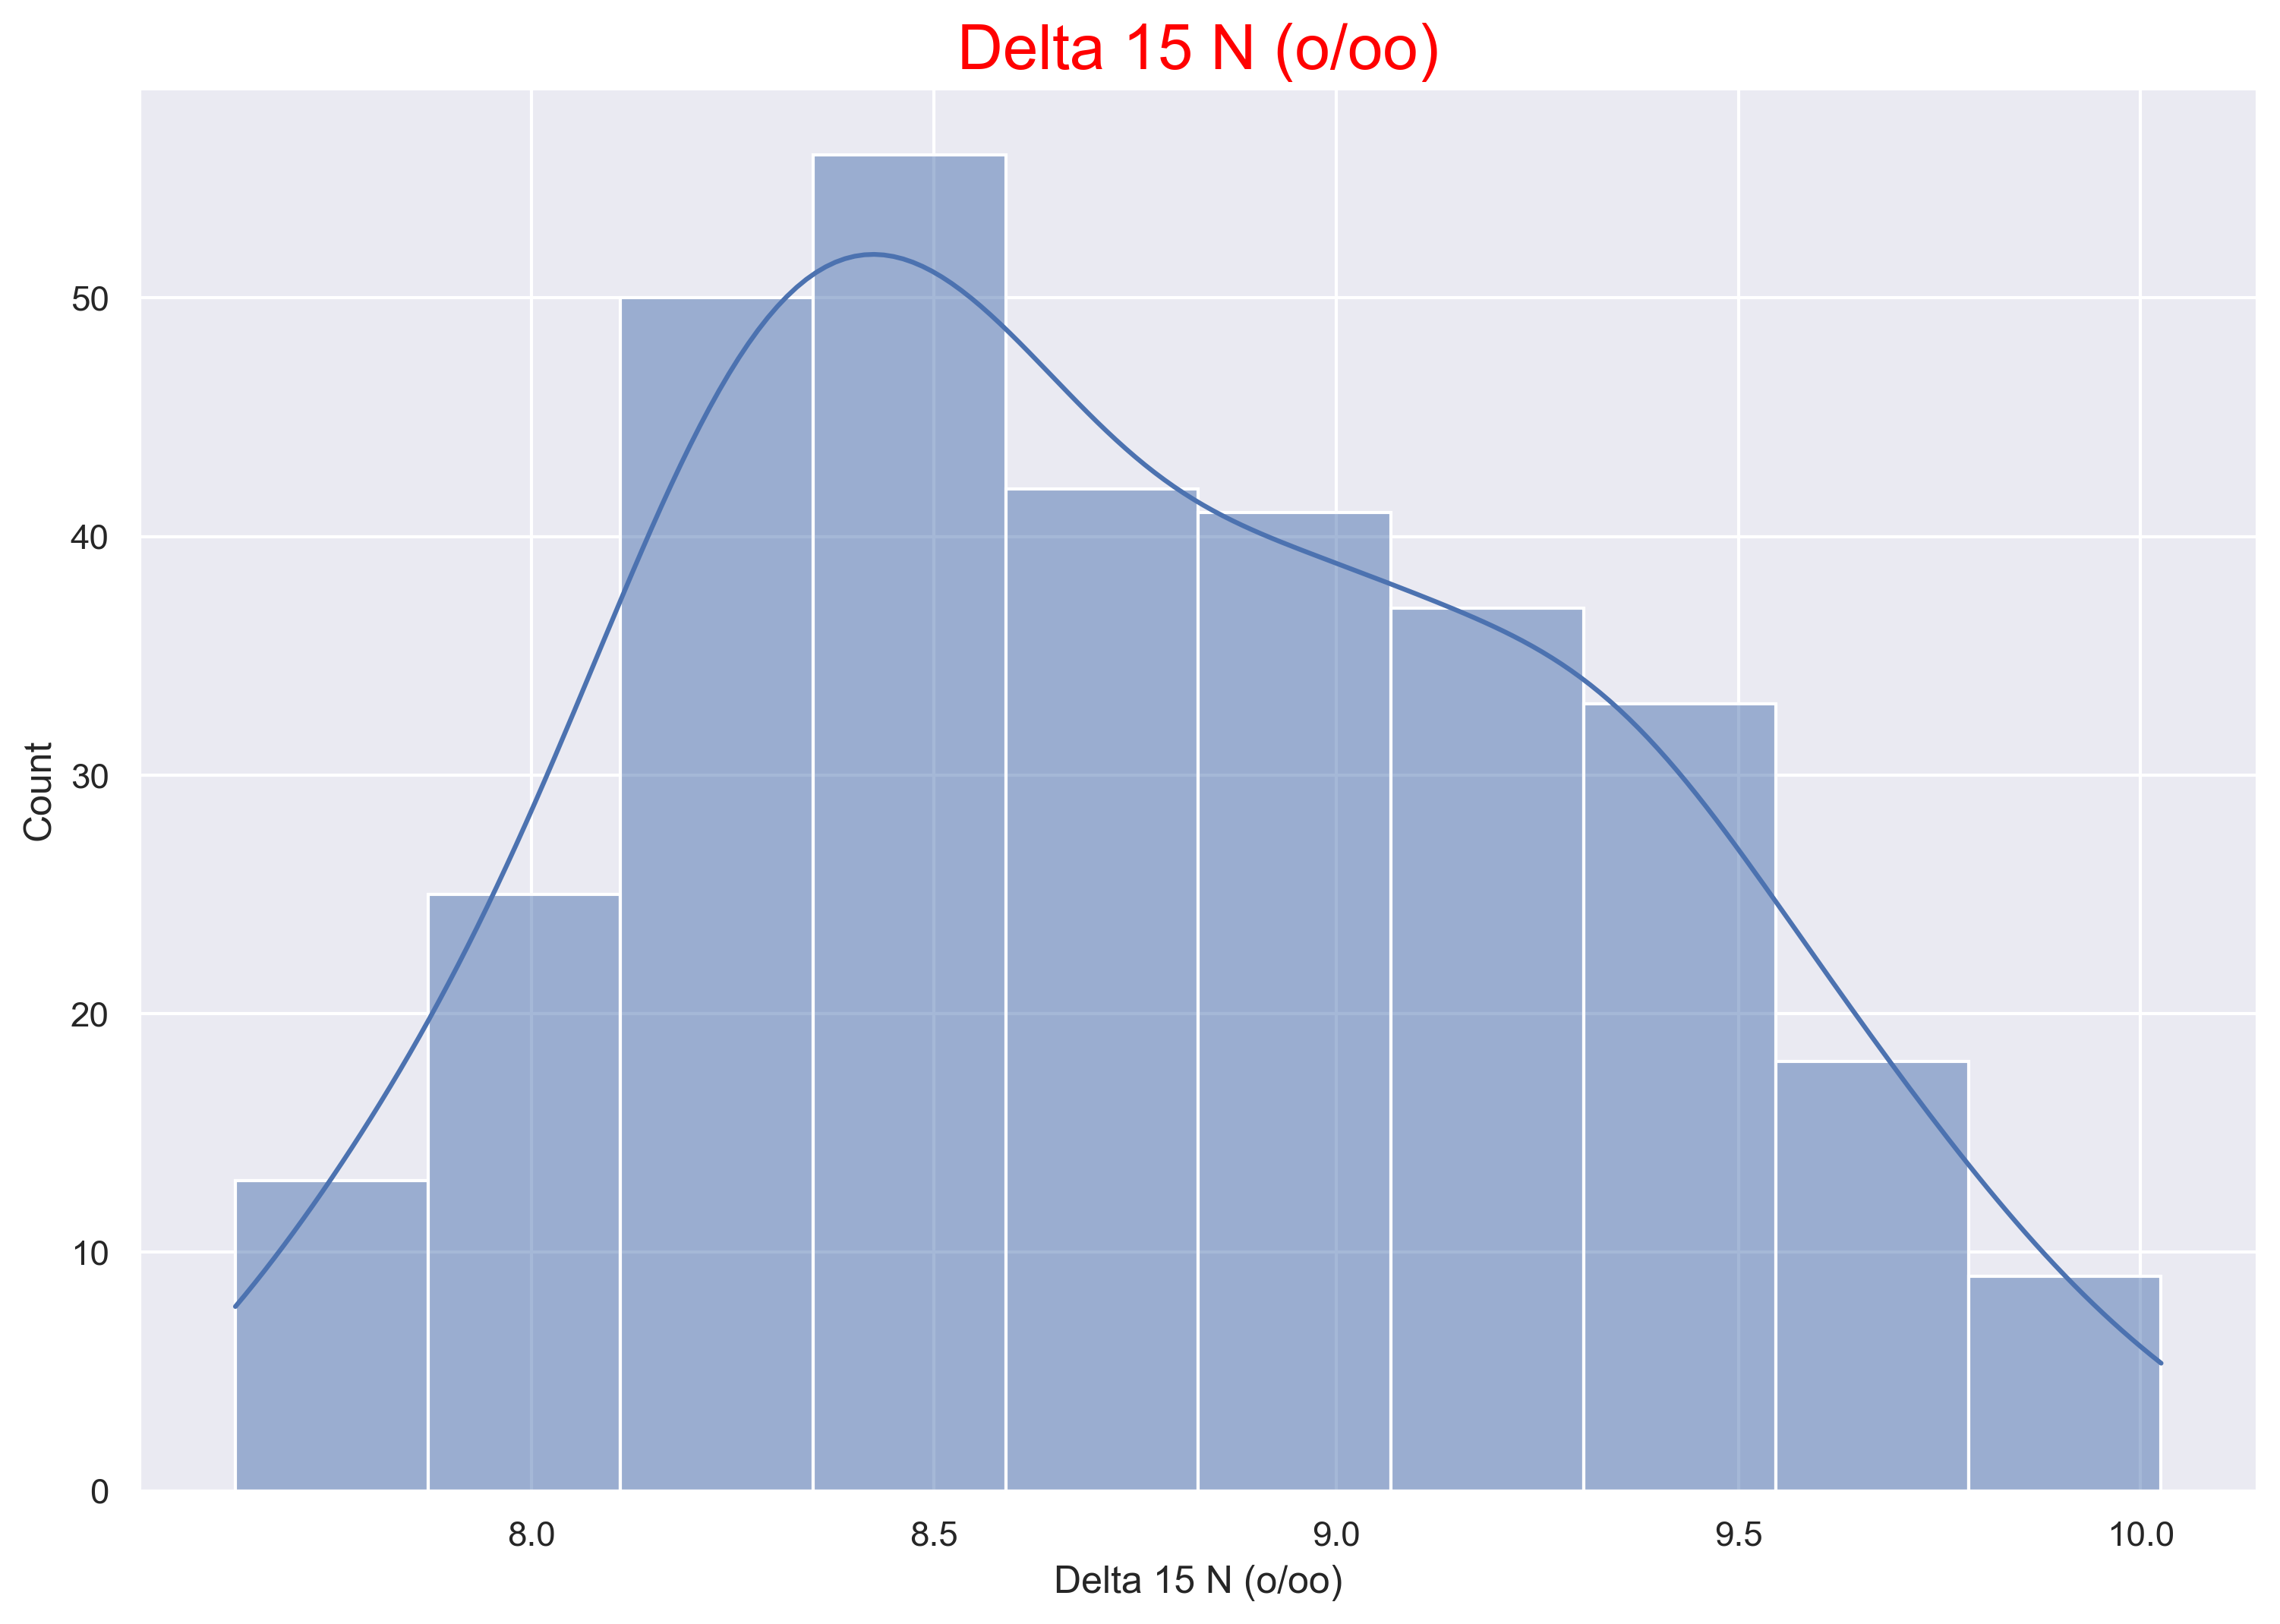

In [20]:
# plot the histgram of Delta 15 N (o/oo)
sns.histplot(x = "Delta 15 N (o/oo)", data = data, kde = True)
plt.title("Delta 15 N (o/oo)", size=20, color="red")

Text(0.5, 1.0, 'Delta 13 C (o/oo)')

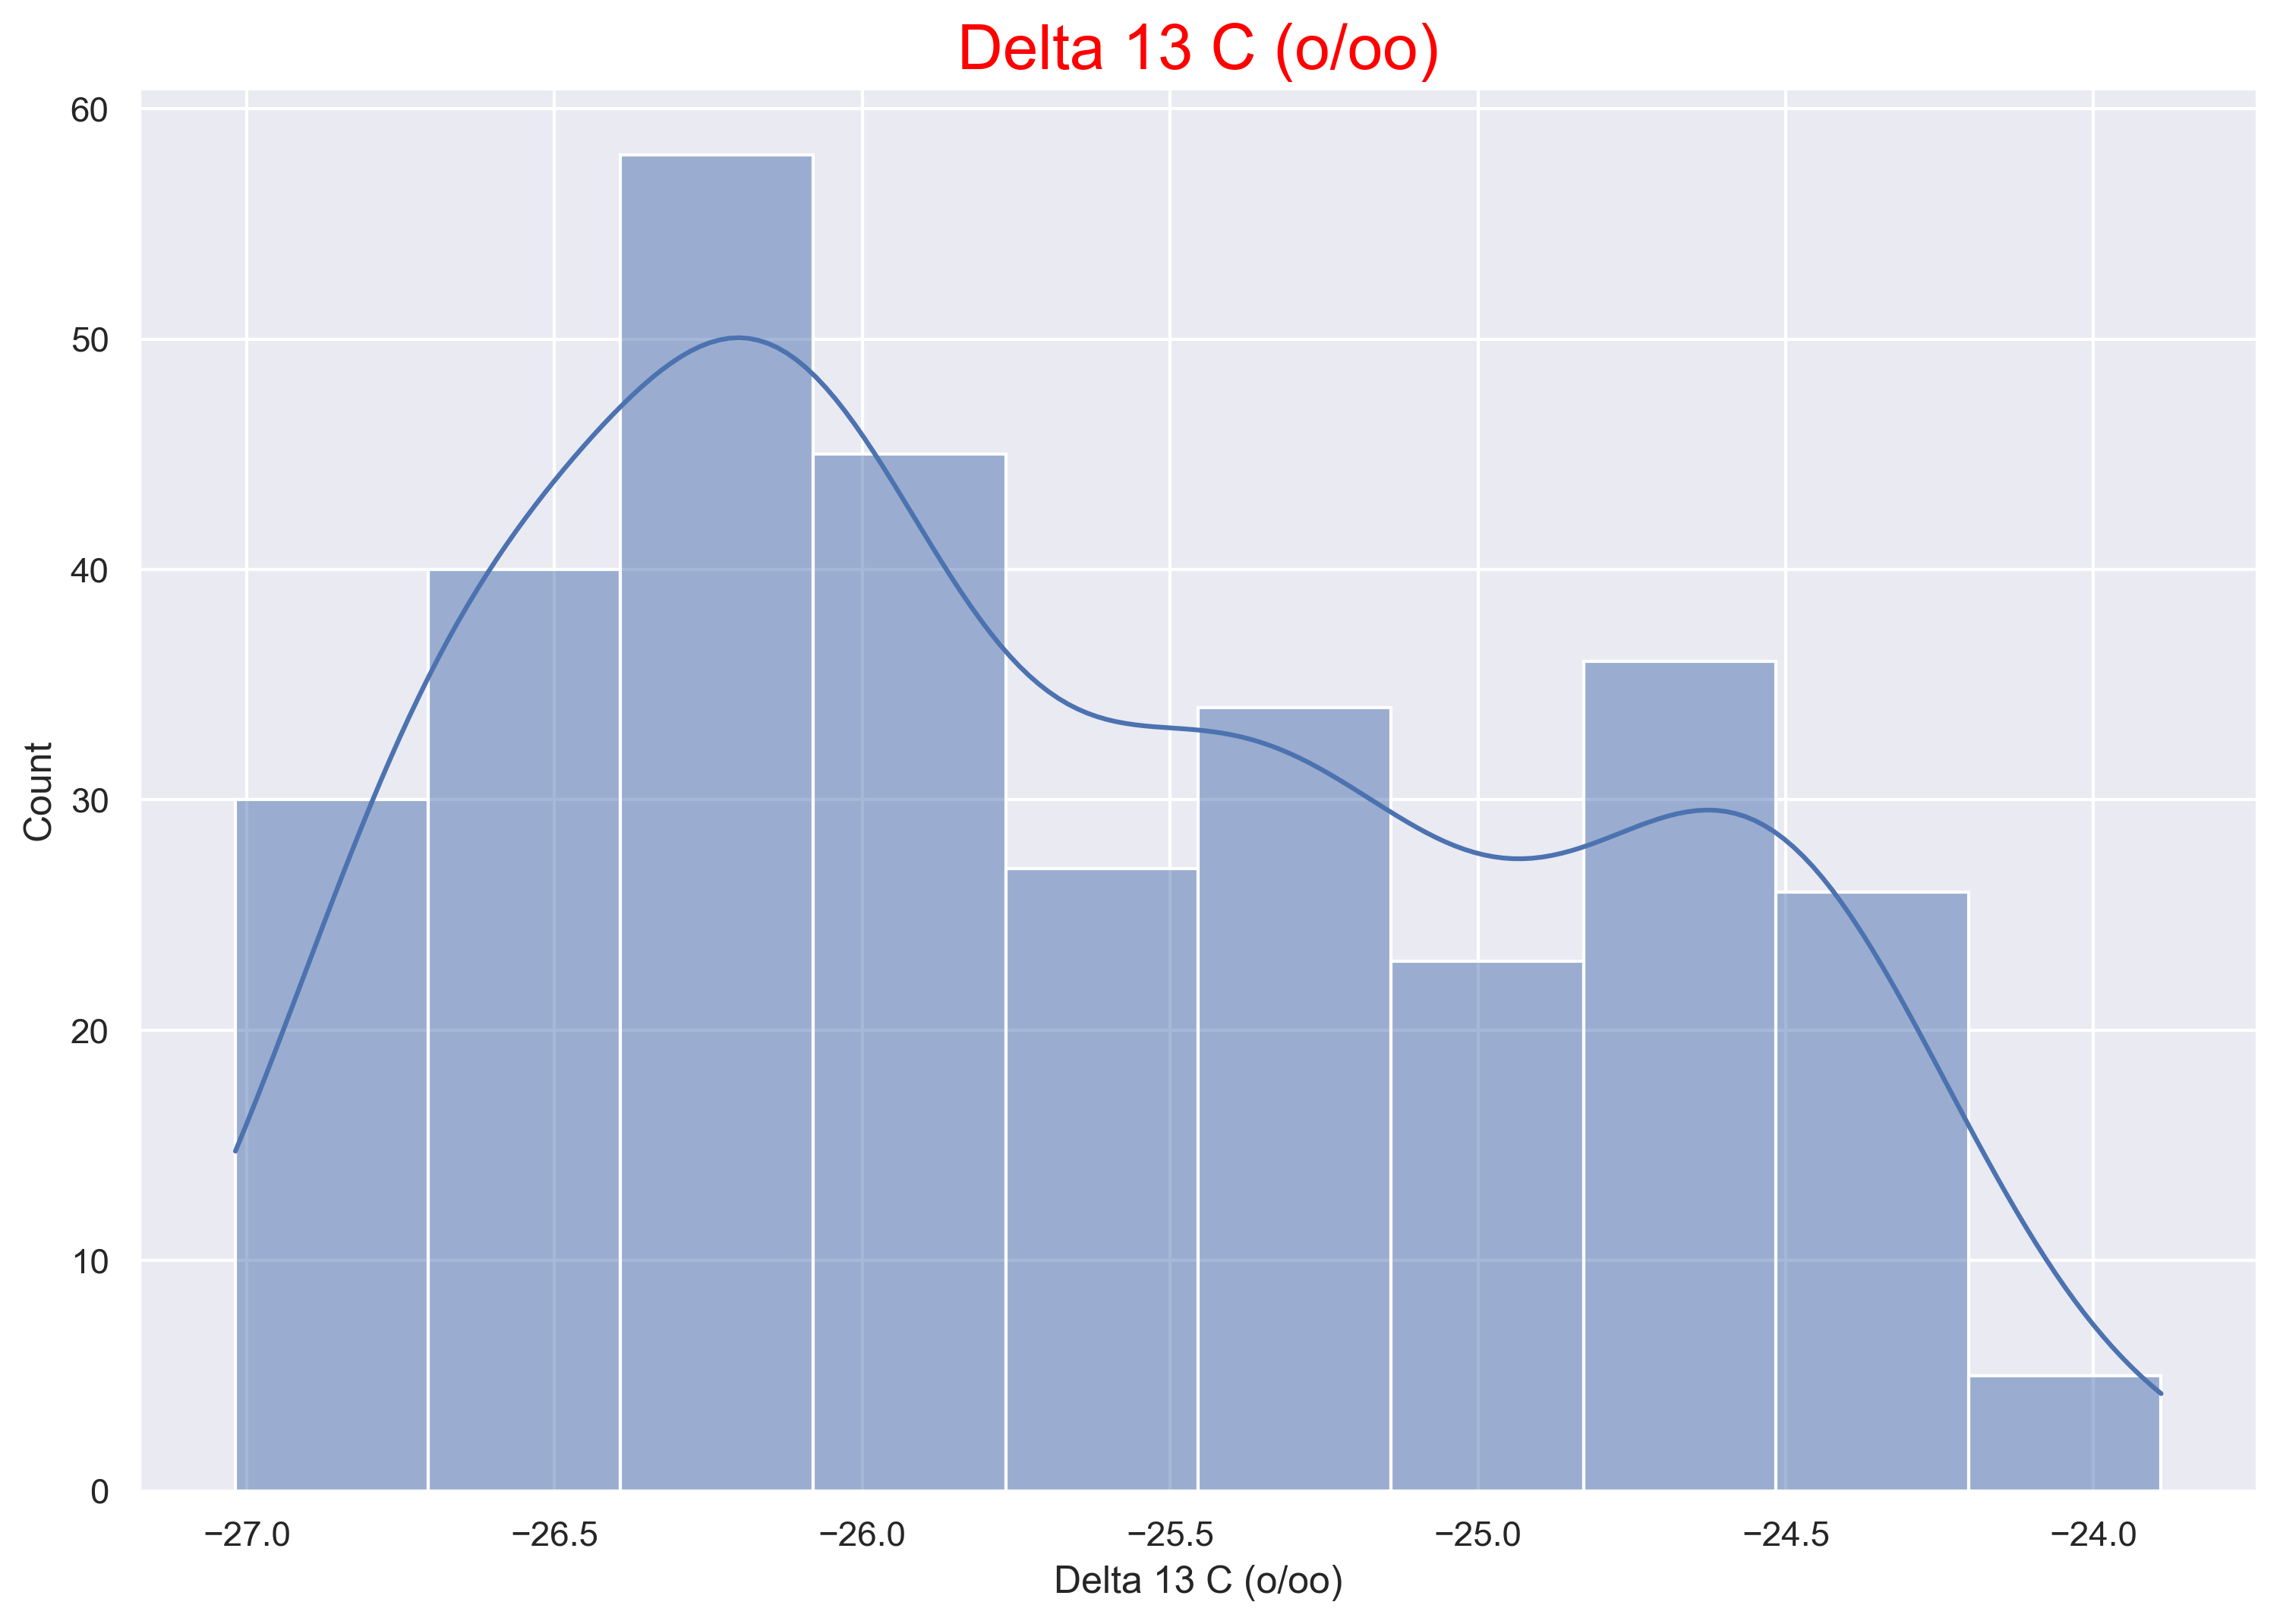

In [21]:
# plot the histgram of Delta 13 C (o/oo)
sns.histplot(x = "Delta 13 C (o/oo)", data = data, kde = True)
plt.title("Delta 13 C (o/oo)", size=20, color="red")

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

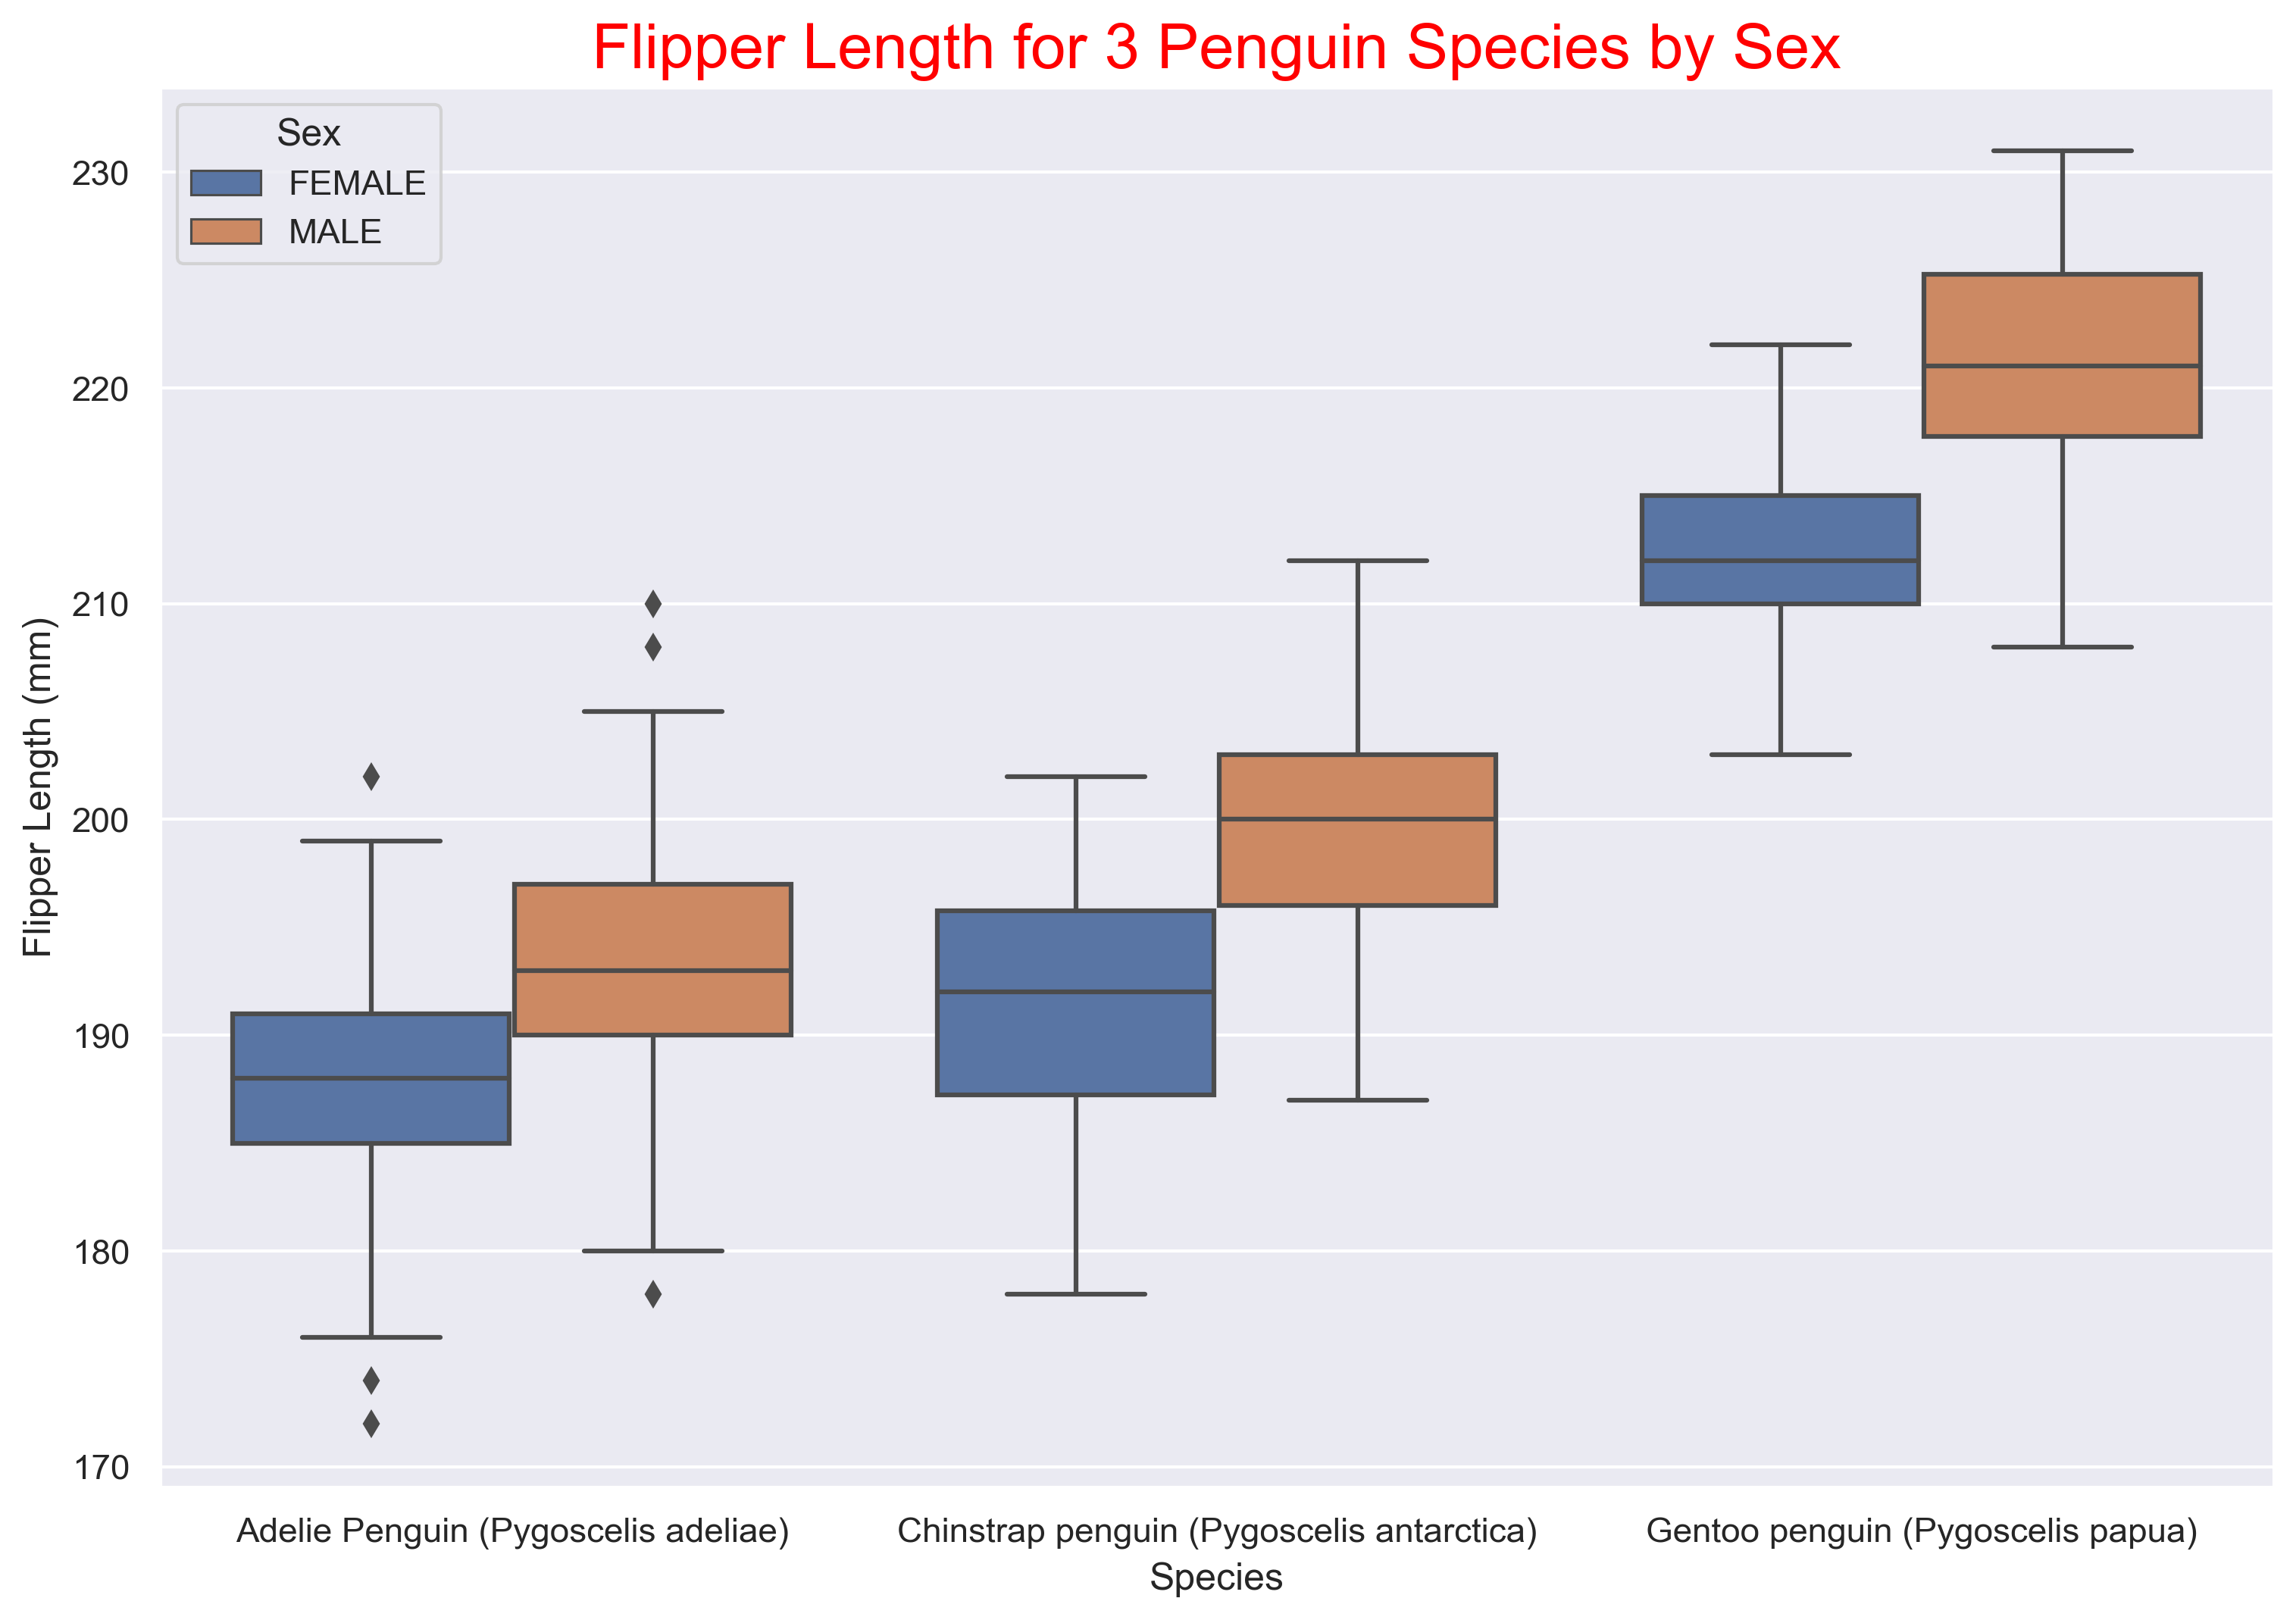

In [22]:
# boxplot by sex
sns.boxplot(x = "Species", y = "Flipper Length (mm)", data =data, hue = "Sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

Text(0.5, 1.0, 'Body Mass (g) for 3 Penguin Species by Sex')

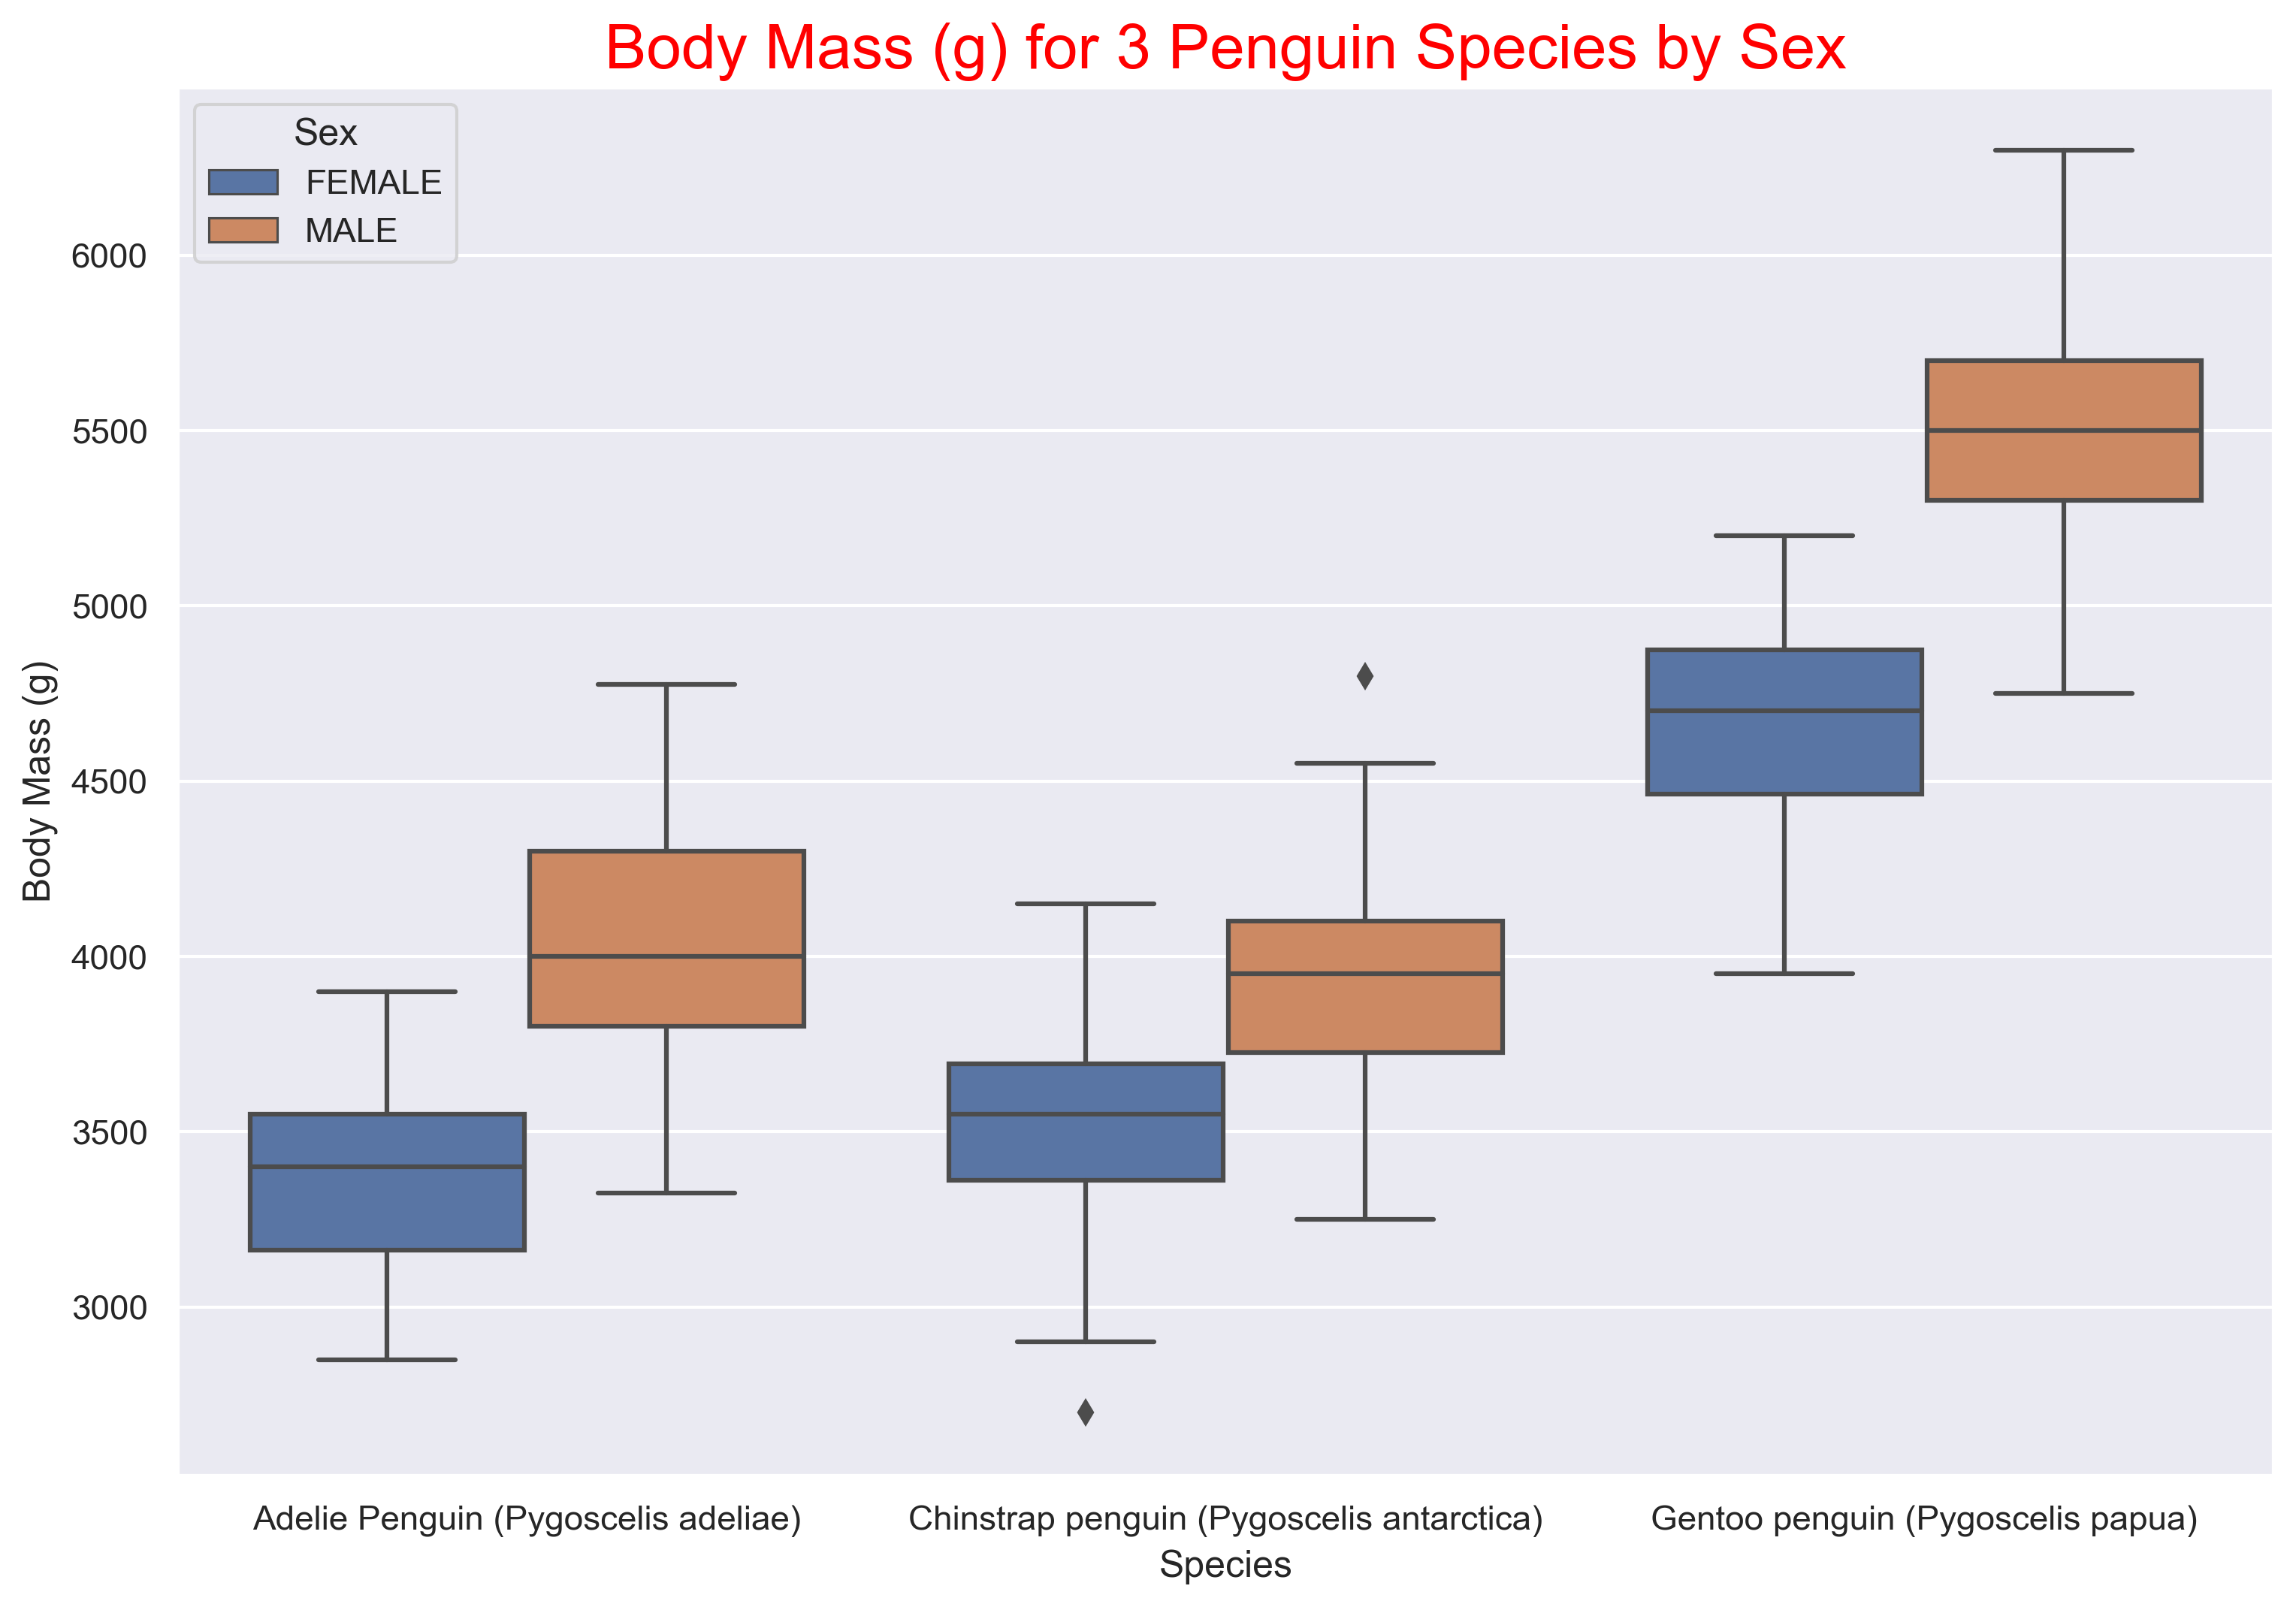

In [23]:
# boxplot by sex
sns.boxplot(x = "Species", y = "Body Mass (g)", data =data, hue = "Sex")
plt.title("Body Mass (g) for 3 Penguin Species by Sex", size=20, color="red")

Text(0.5, 1.0, 'Culmen Length (mm) for 3 Penguin Species by Sex')

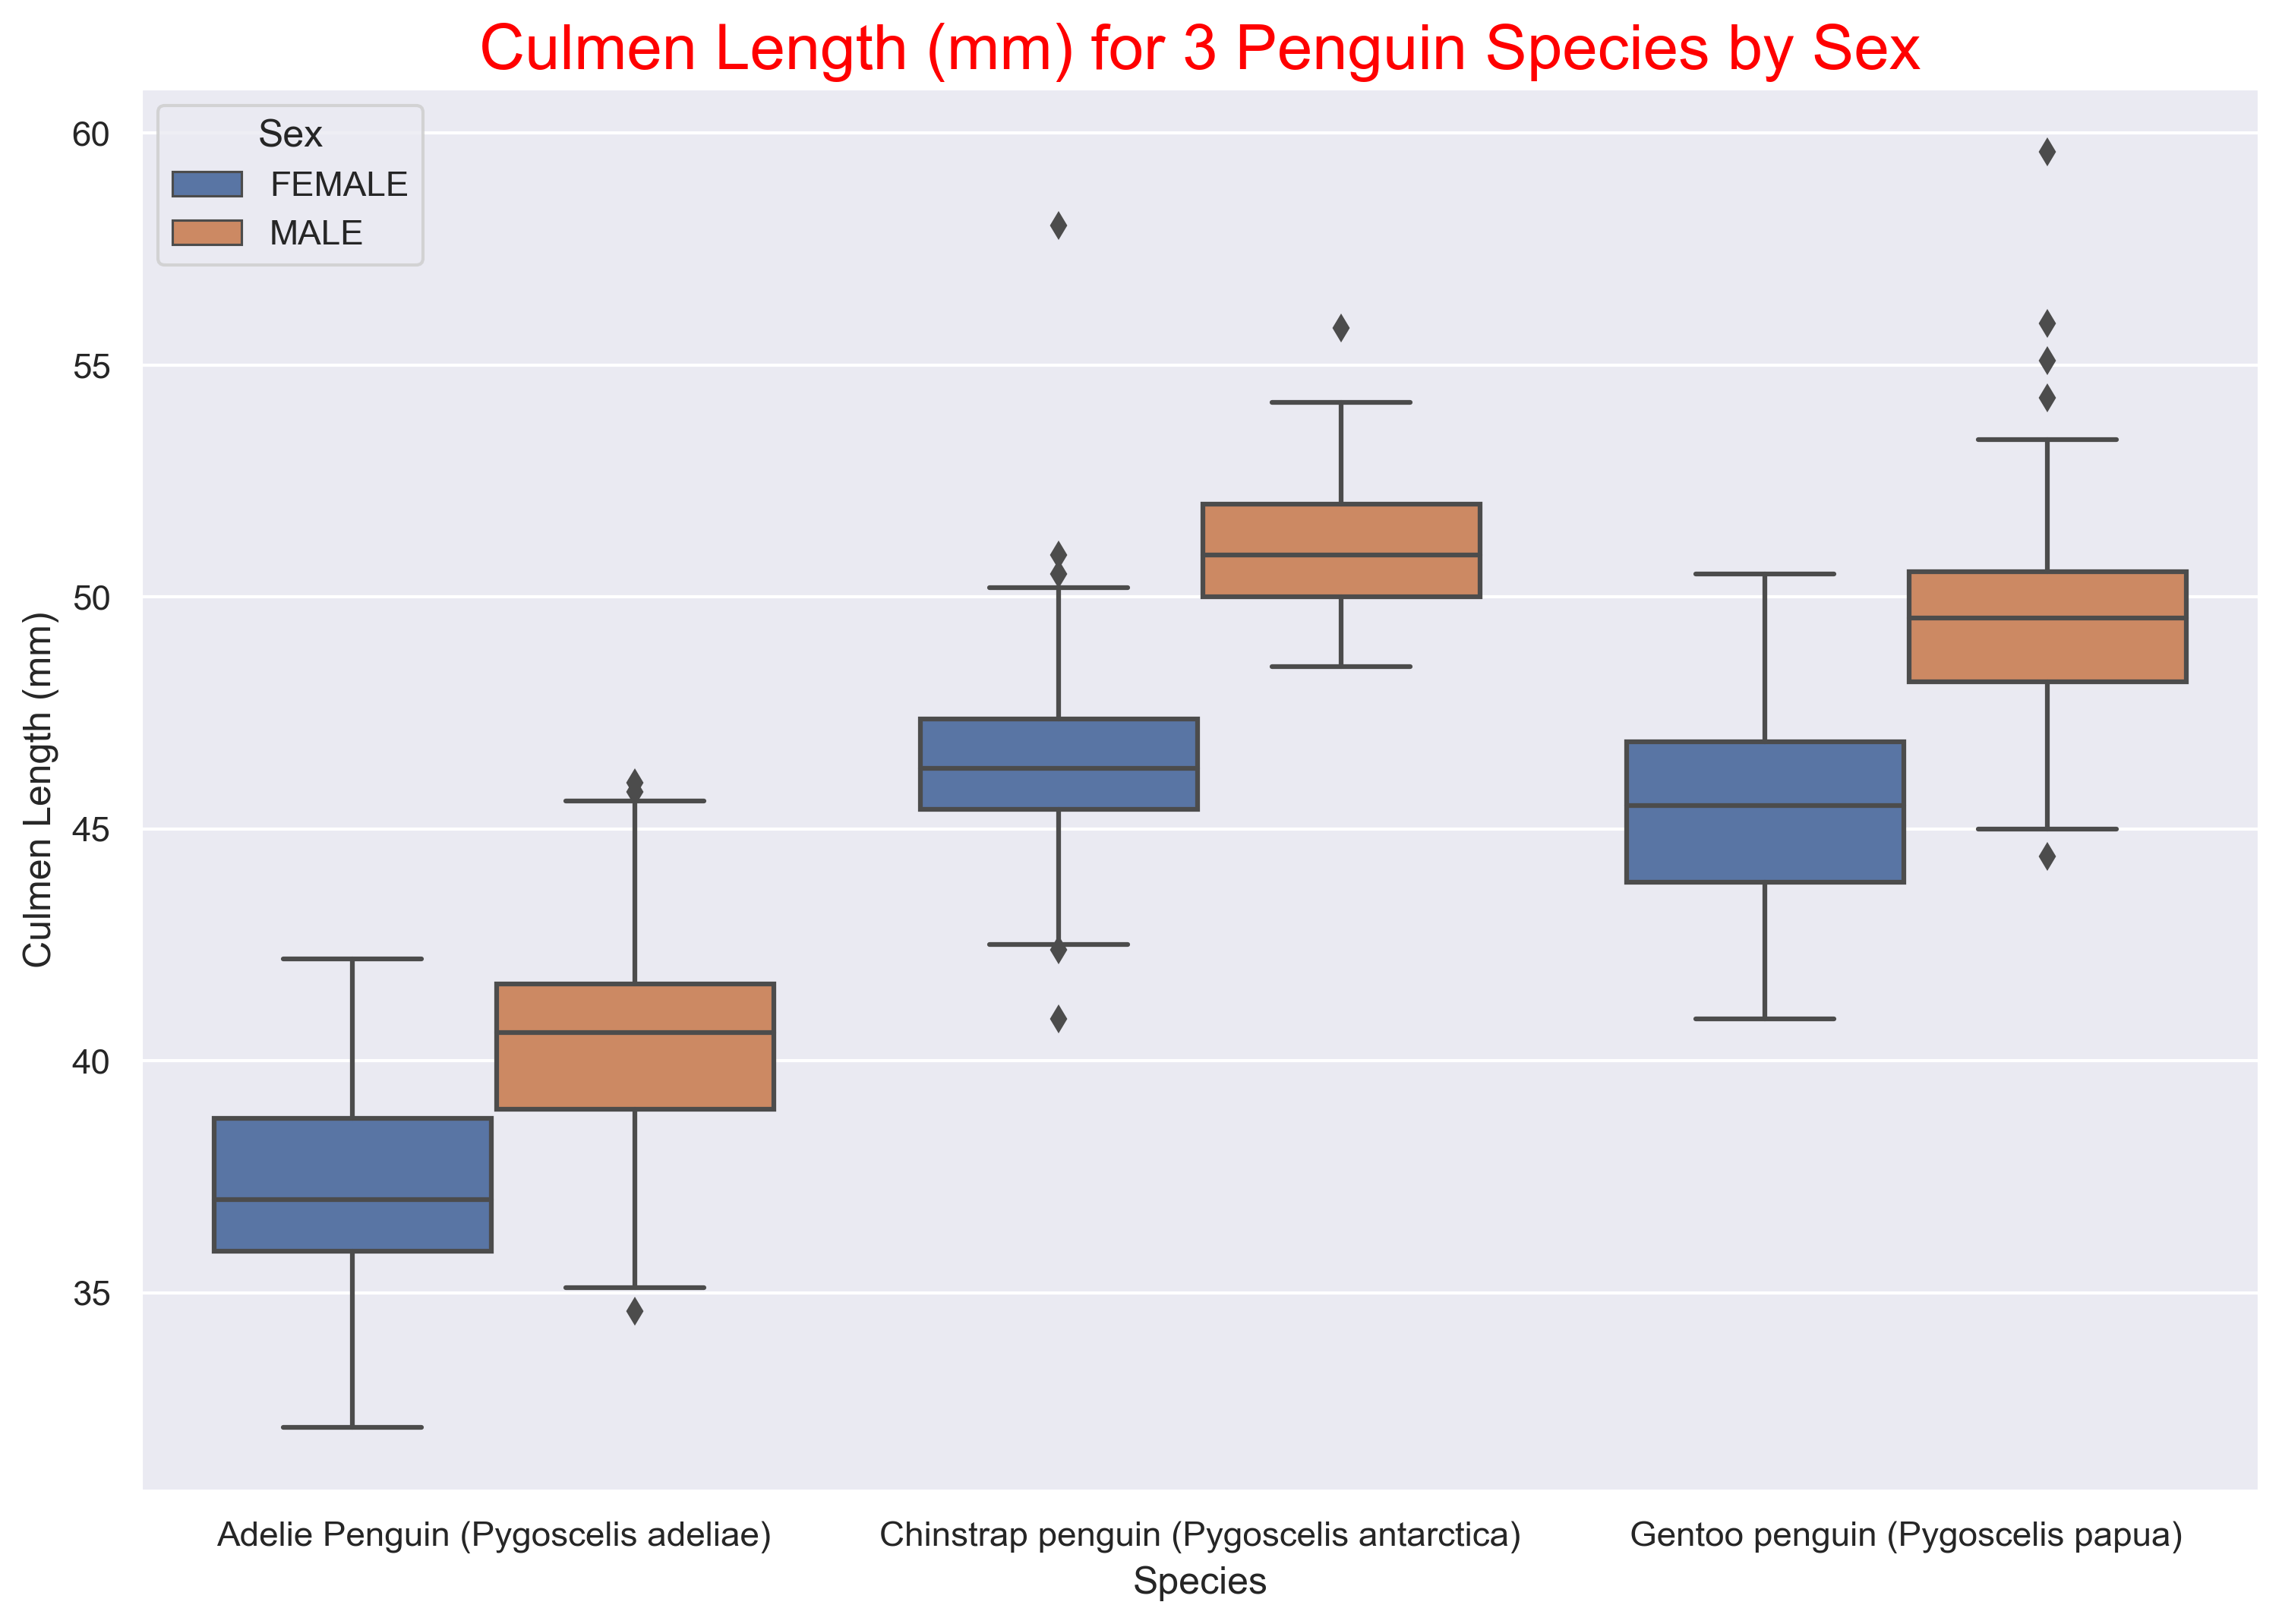

In [24]:
# boxplot by sex
sns.boxplot(x = "Species", y = "Culmen Length (mm)", data = data, hue='Sex')
plt.title("Culmen Length (mm) for 3 Penguin Species by Sex", size=20, color="red")

Text(0.5, 1.0, 'Culmen Depth (mm) for 3 Penguin Species by Sex')

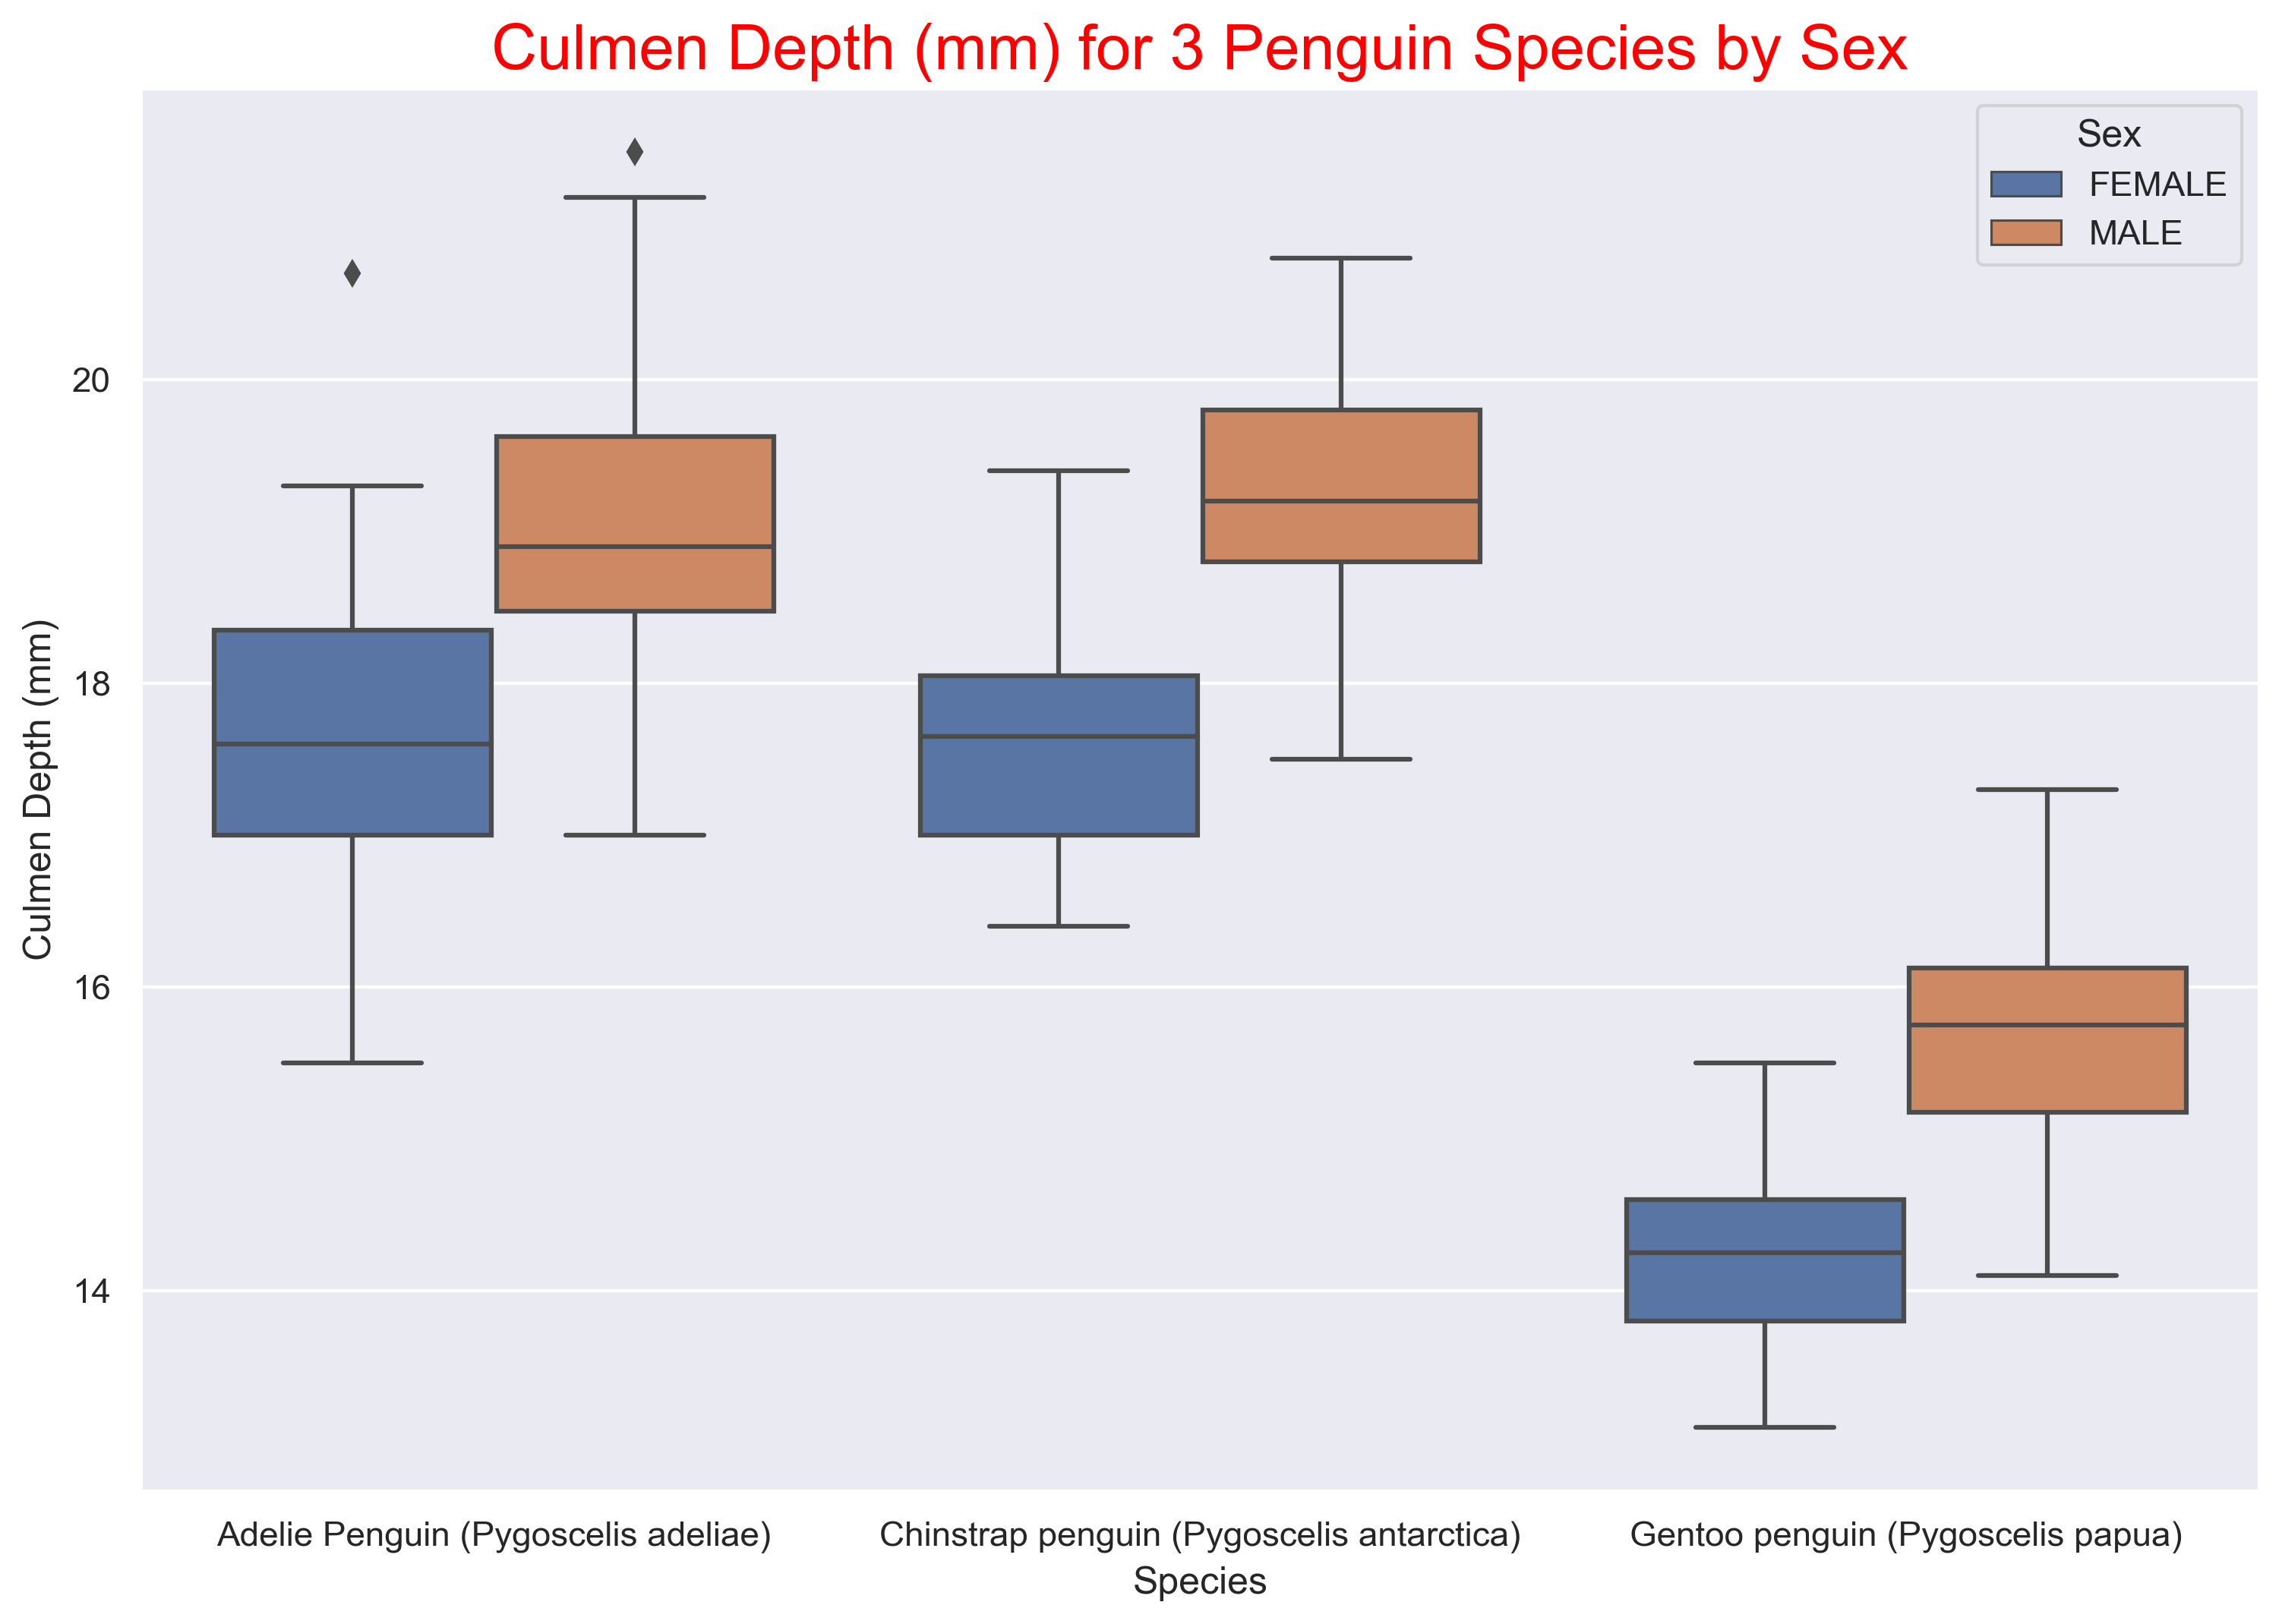

In [25]:
# boxplot by sex
sns.boxplot(x = "Species", y = "Culmen Depth (mm)", data =data, hue = "Sex")
plt.title("Culmen Depth (mm) for 3 Penguin Species by Sex", size=20, color="red")

Text(0.5, 1.0, 'Delta 15 N (o/oo) for 3 Penguin Species by Sex')

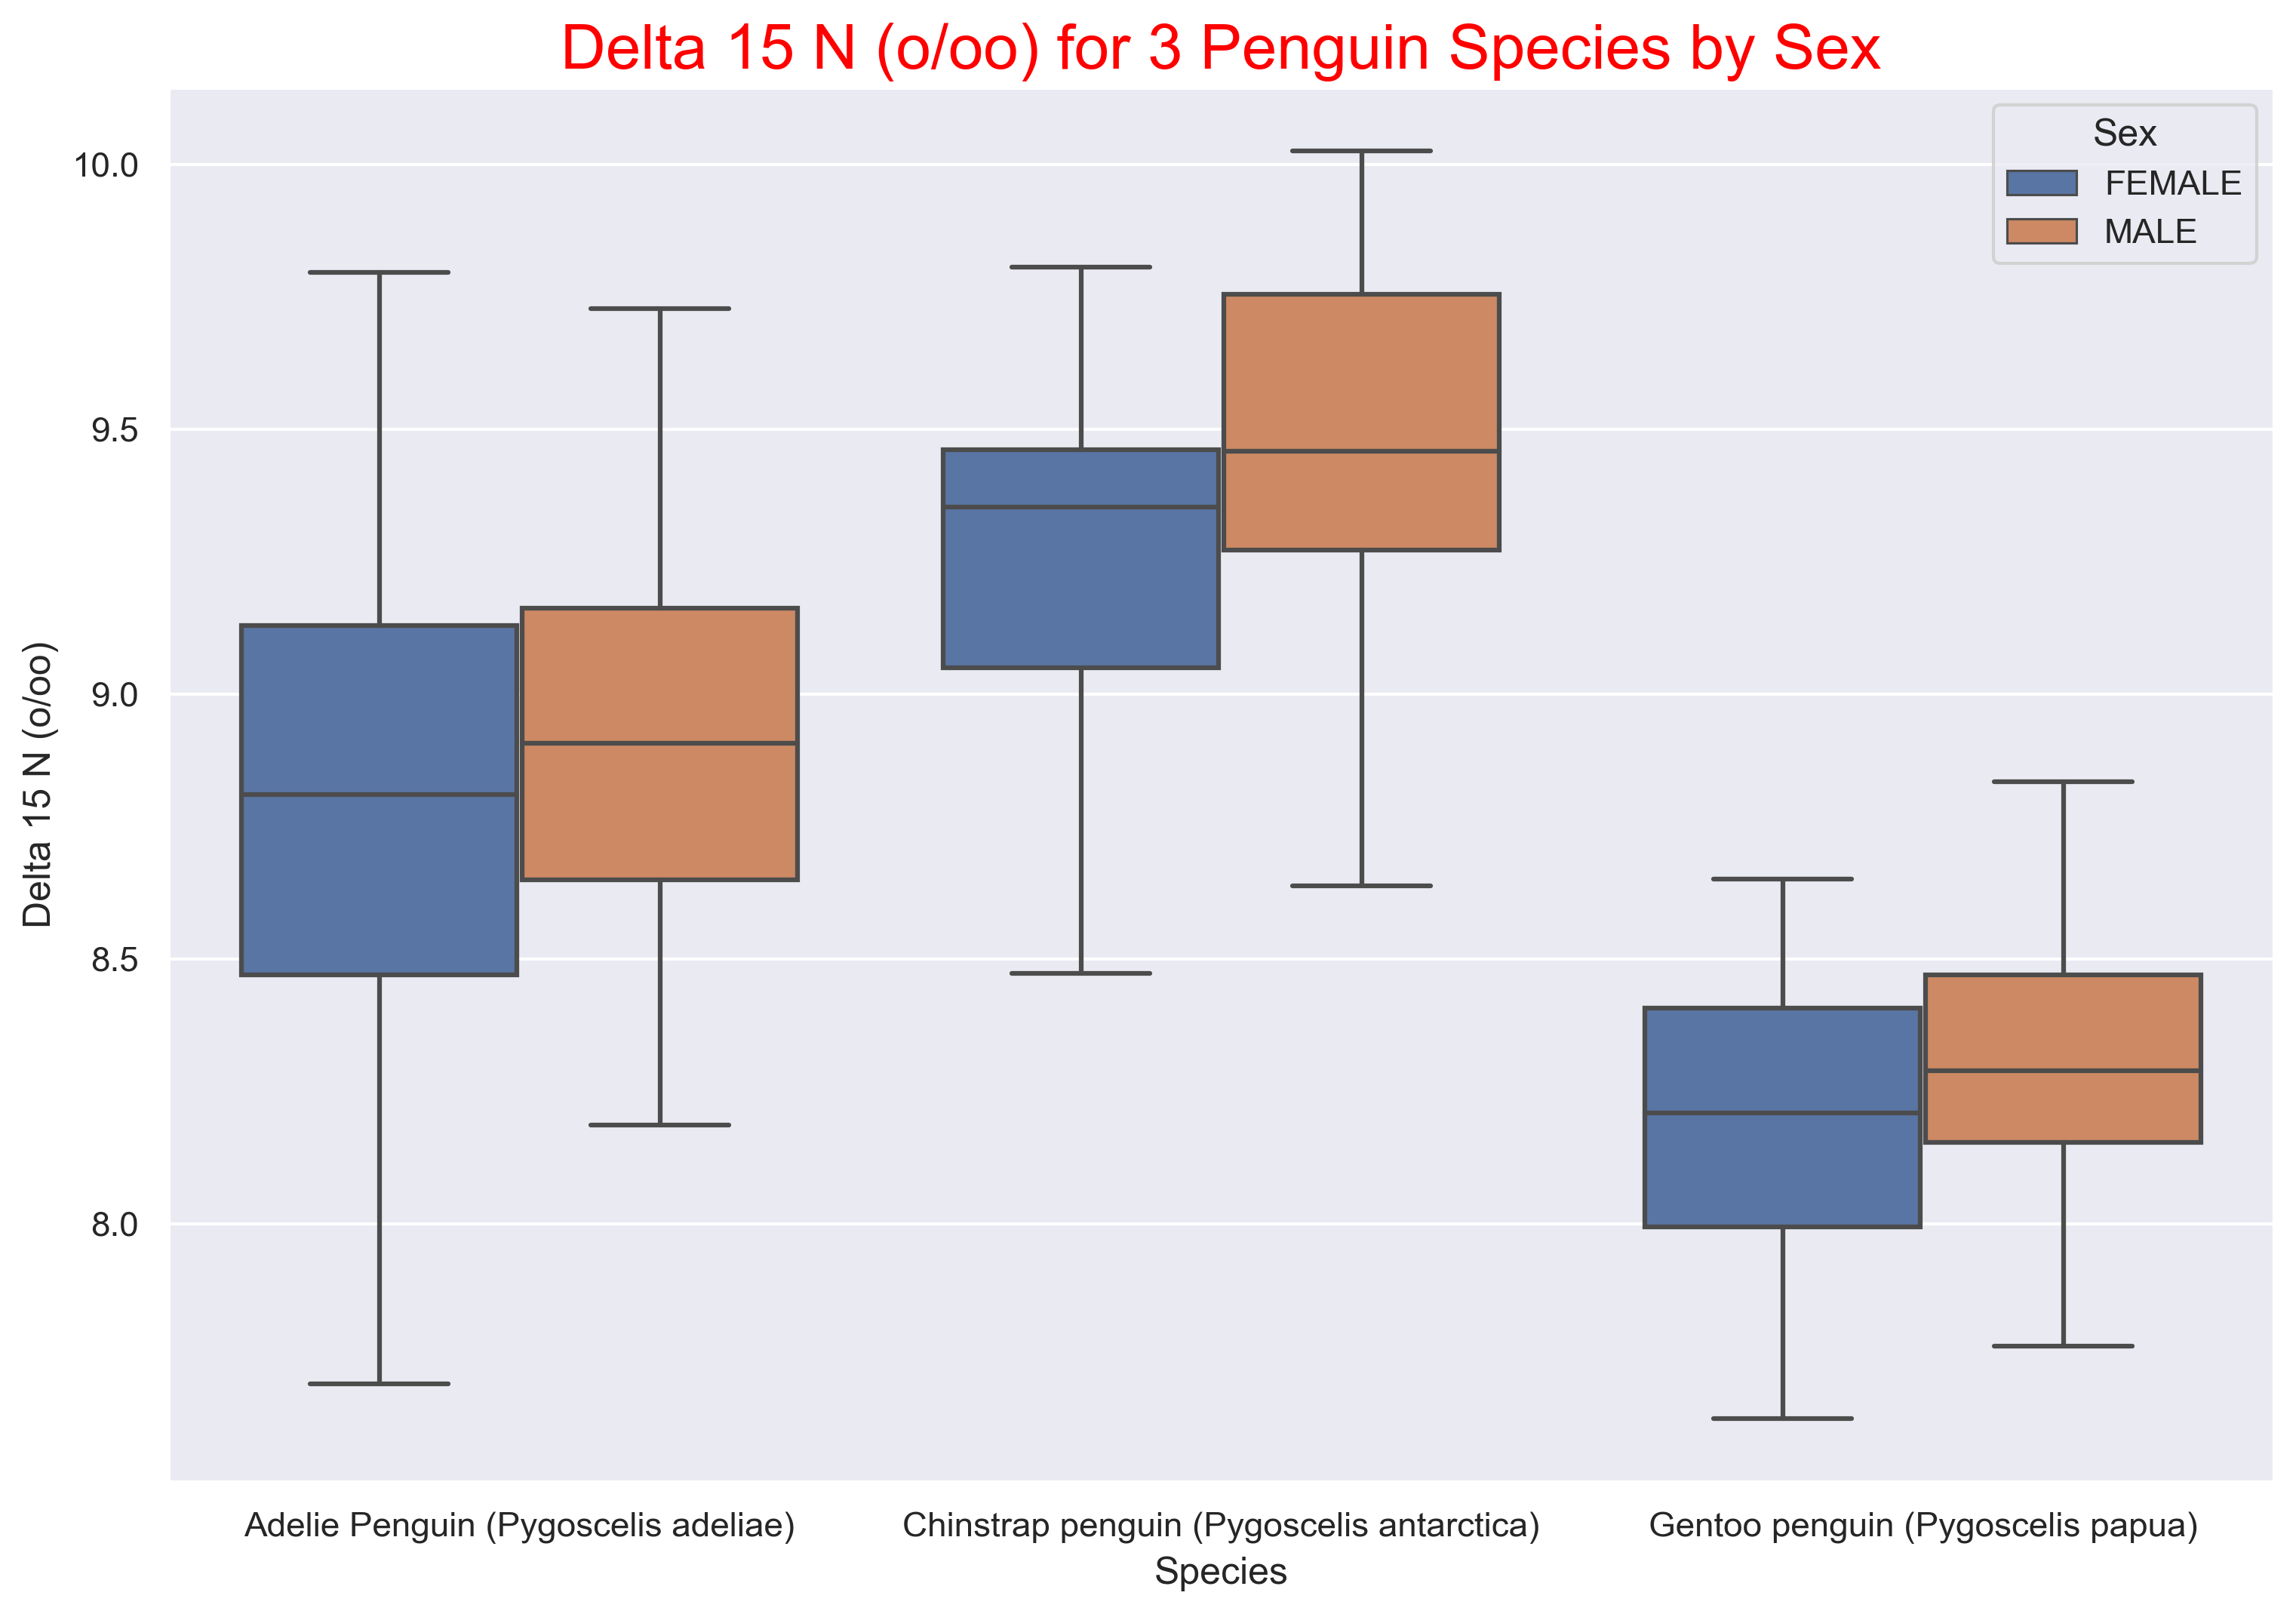

In [26]:
sns.boxplot(x = "Species", y = "Delta 15 N (o/oo)", data =data, hue = "Sex")
plt.title("Delta 15 N (o/oo) for 3 Penguin Species by Sex", size=20, color="red")

Text(0.5, 1.0, 'Delta 13 C (o/oo) for 3 Penguin Species by Sex')

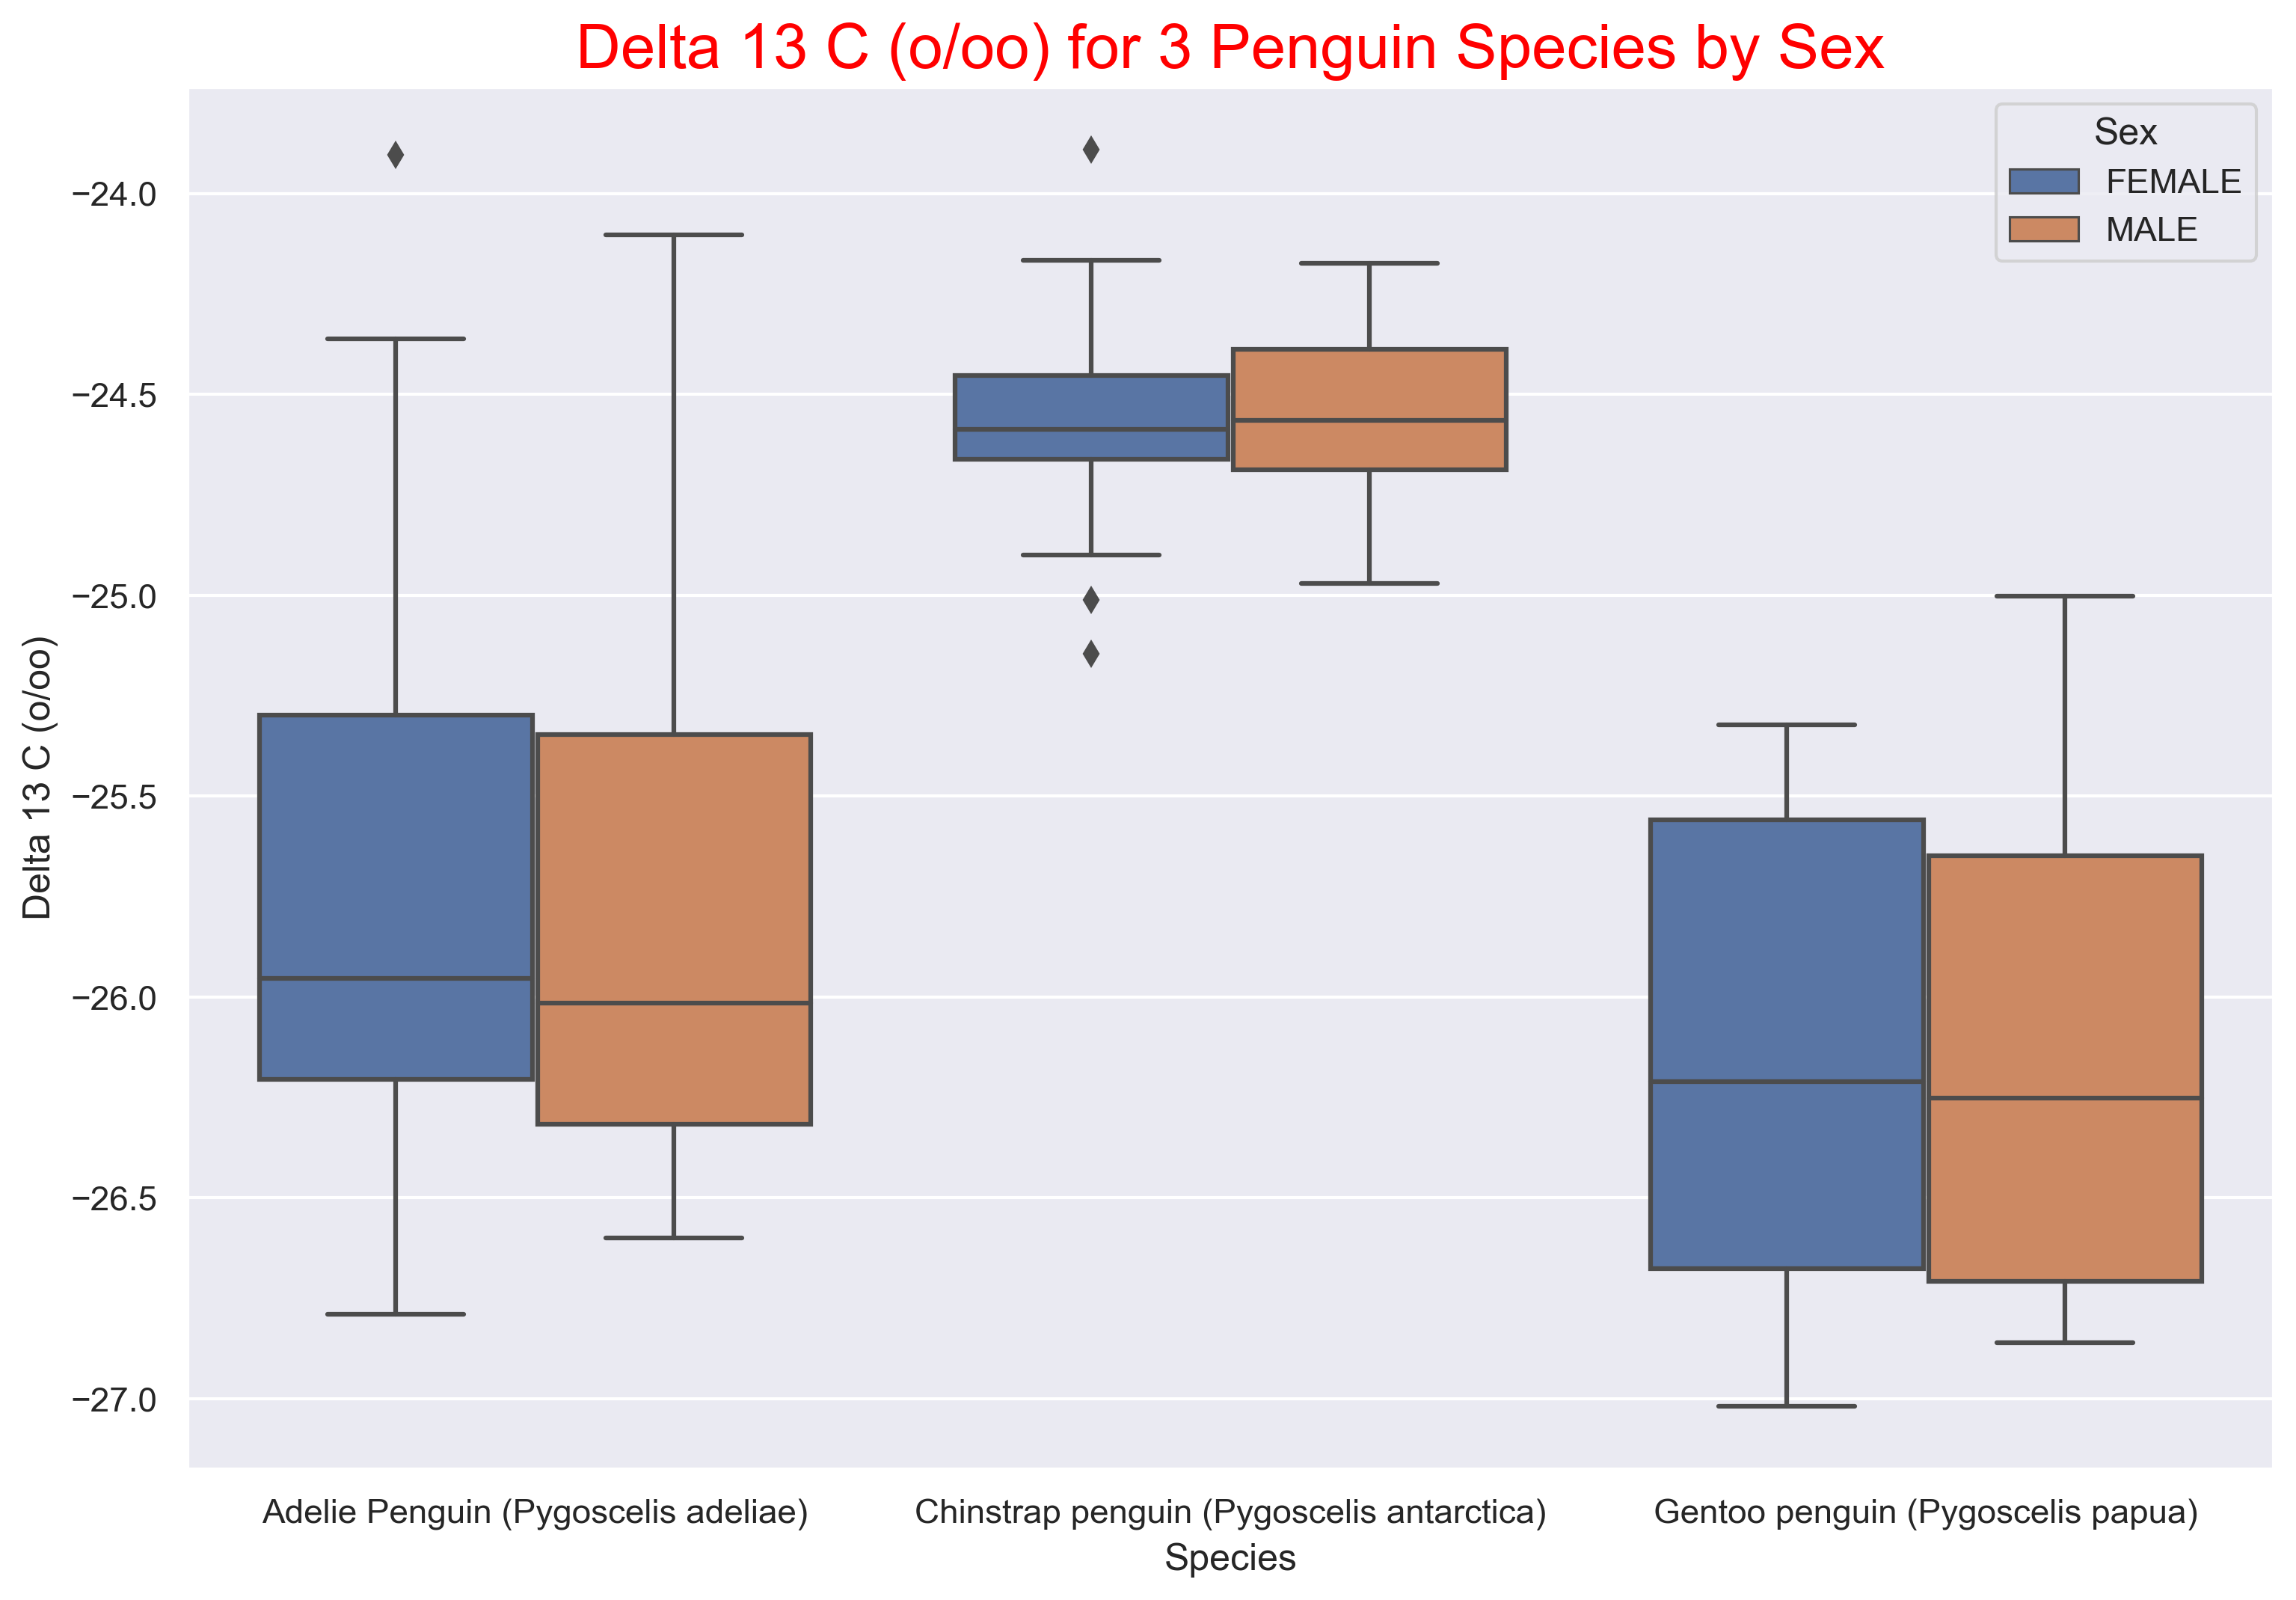

In [27]:
sns.boxplot(x = "Species", y = "Delta 13 C (o/oo)", data =data, hue = "Sex")
plt.title("Delta 13 C (o/oo) for 3 Penguin Species by Sex", size=20, color="red")

**Conclusion**:
1. Gentoo Penguins distinguish from the other two species by the significantly higher Flipper Length, Body Mass, and smaller Culmen Depth.
2. Adelie Penguins distinguish from the other two species by the smaller Culmen Length.
3. Chinstrap Penguins distinguish from the other two species by the higher Delta 13 C.
4. Flipper Length, Body Mass, Culmen Depth, Culmen Length are related to Sex. So we include the feature Sex into our model.

Text(0.5, 1.0, 'Culmen Depth (mm) for 3 Penguin Species by Sex')

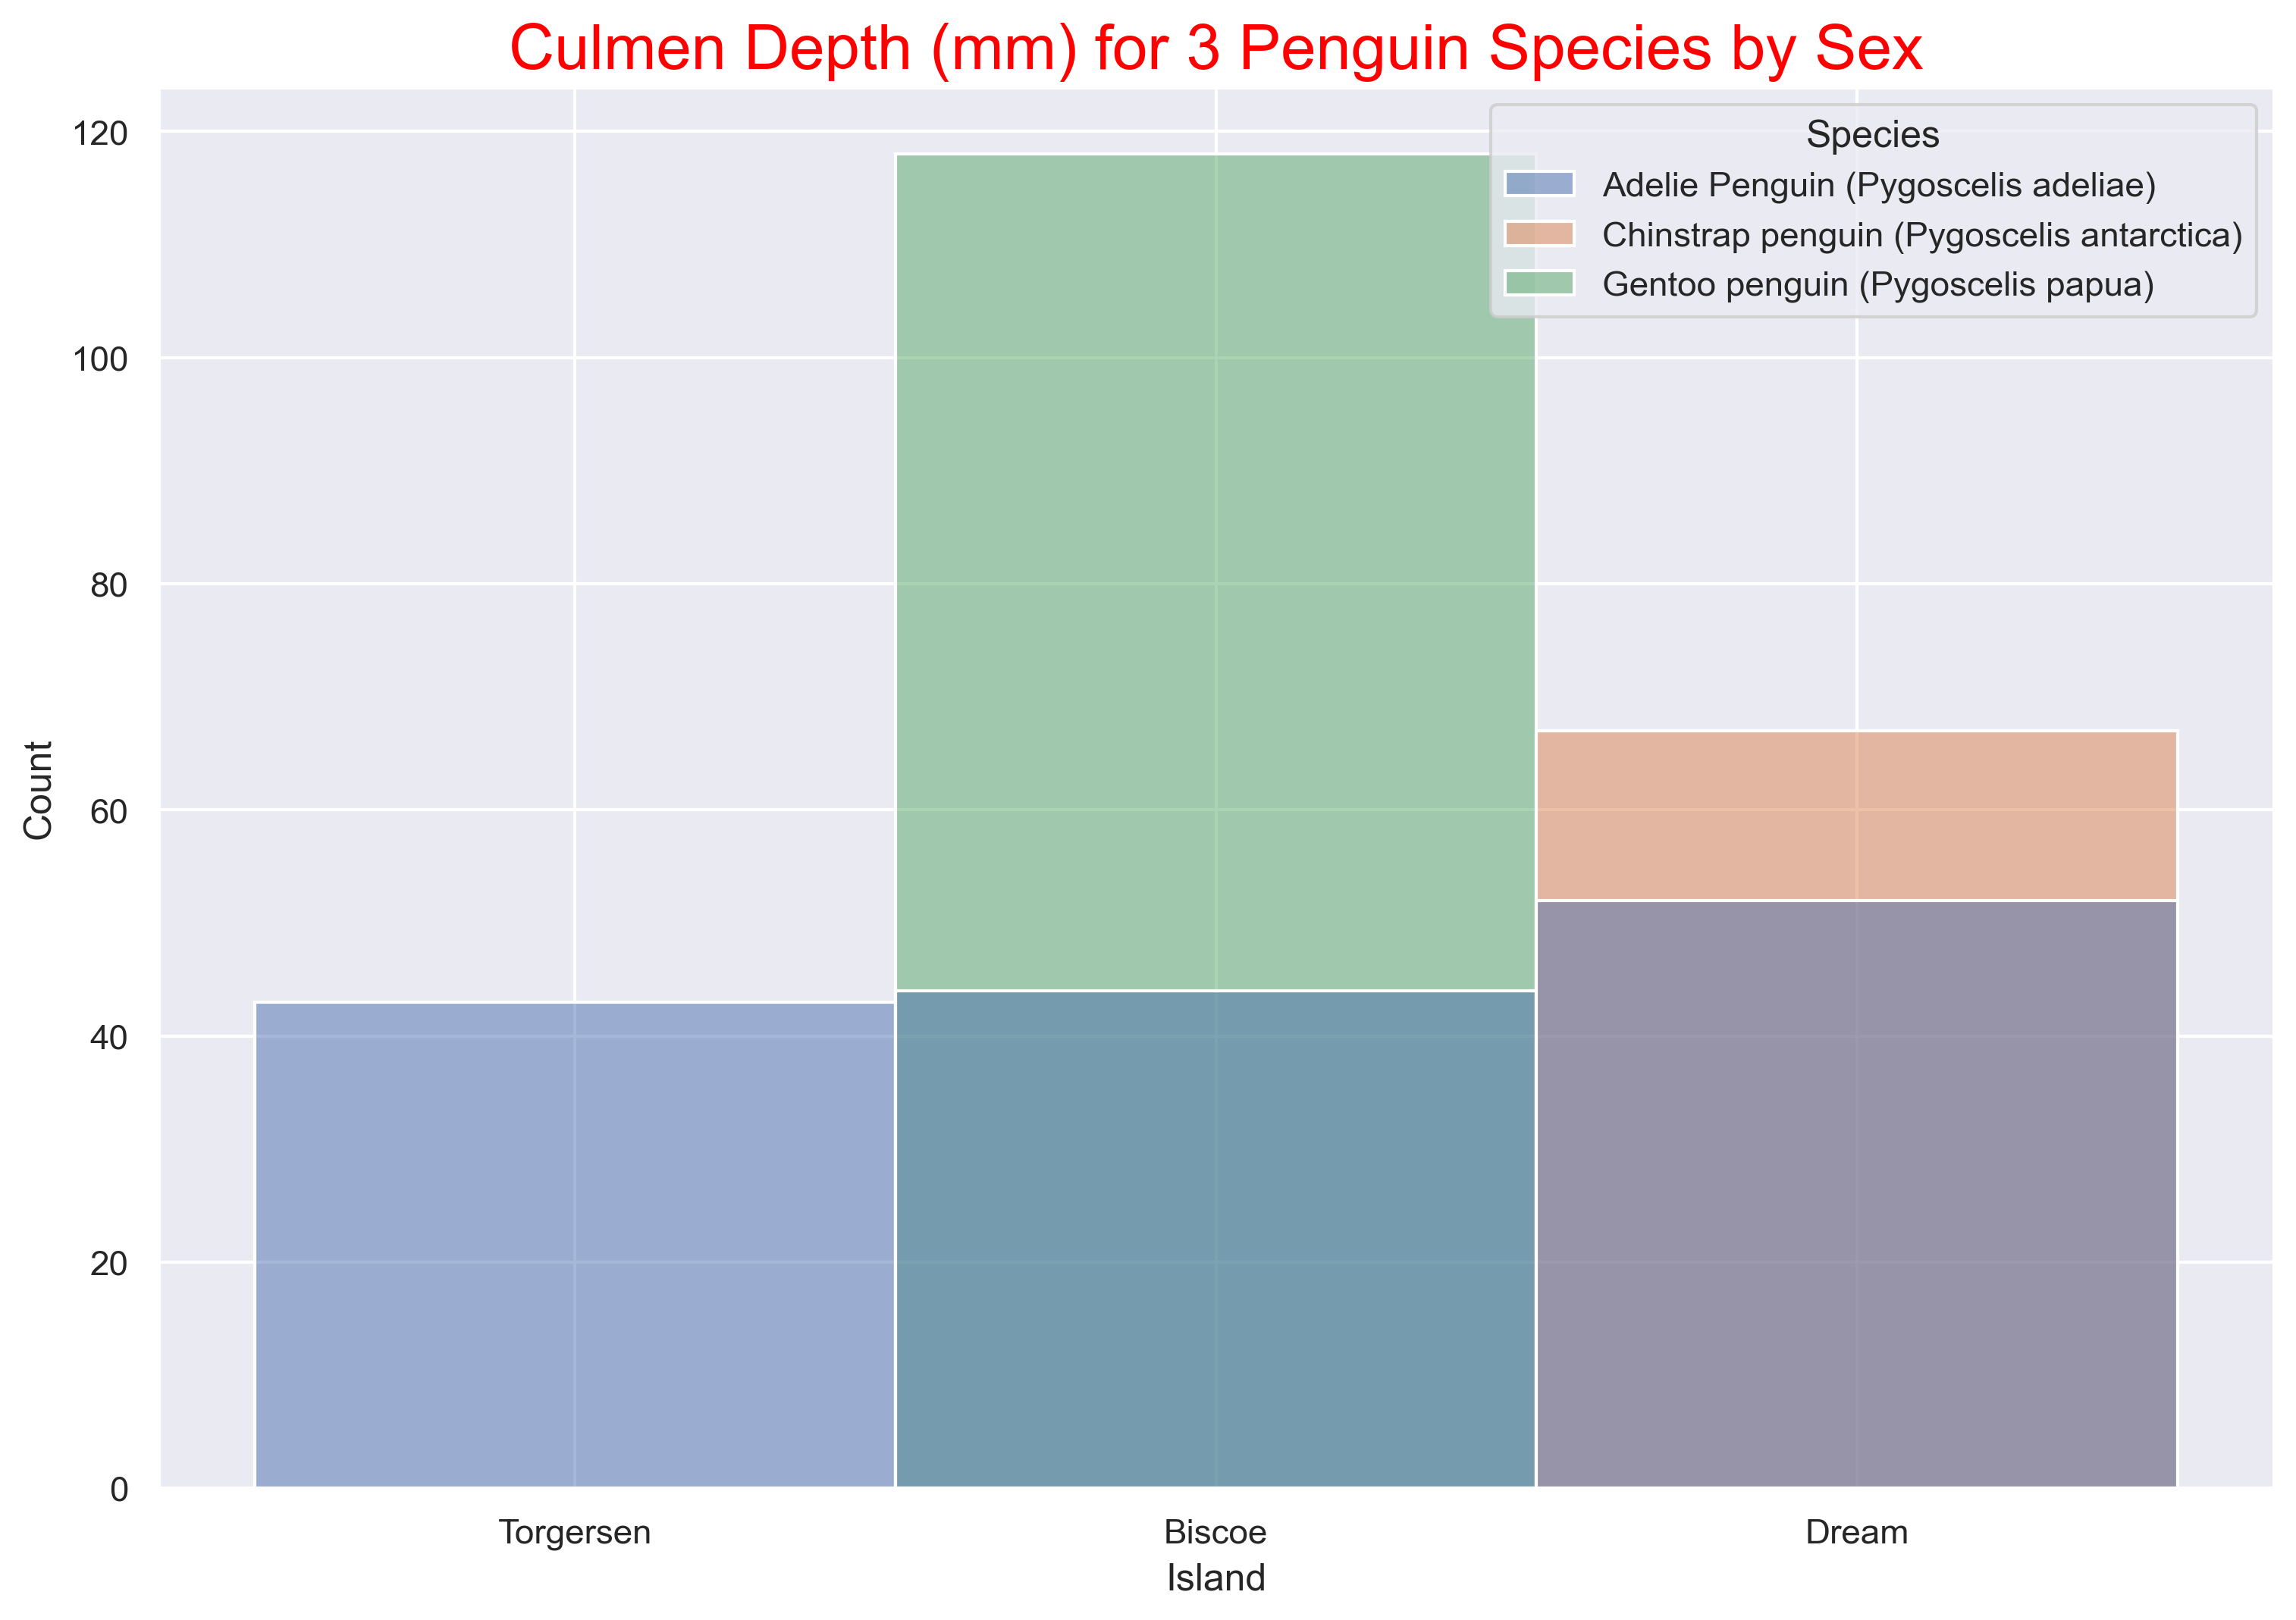

In [28]:
# boxplot by sex
sns.histplot(x = "Island", data =data, hue="Species")
plt.title("Culmen Depth (mm) for 3 Penguin Species by Sex", size=20, color="red")

In [29]:
island_count_species = pd.crosstab(index=data['Species'], columns=data['Island'])
island_count_species

Island,Biscoe,Dream,Torgersen
Species,,,
Adelie Penguin (Pygoscelis adeliae),44,52,43
Chinstrap penguin (Pygoscelis antarctica),0,67,0
Gentoo penguin (Pygoscelis papua),118,0,0


**We find that**:
1. No Chinstrap penguin lives on Biscoe Island.
2. No Gentoo penguin lives on Dream Island.
3. Only Adelie penguins live on Torgersen Island.

C:\Users\zheyan\AppData\Local\Temp\ipykernel_26168\3494267325.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

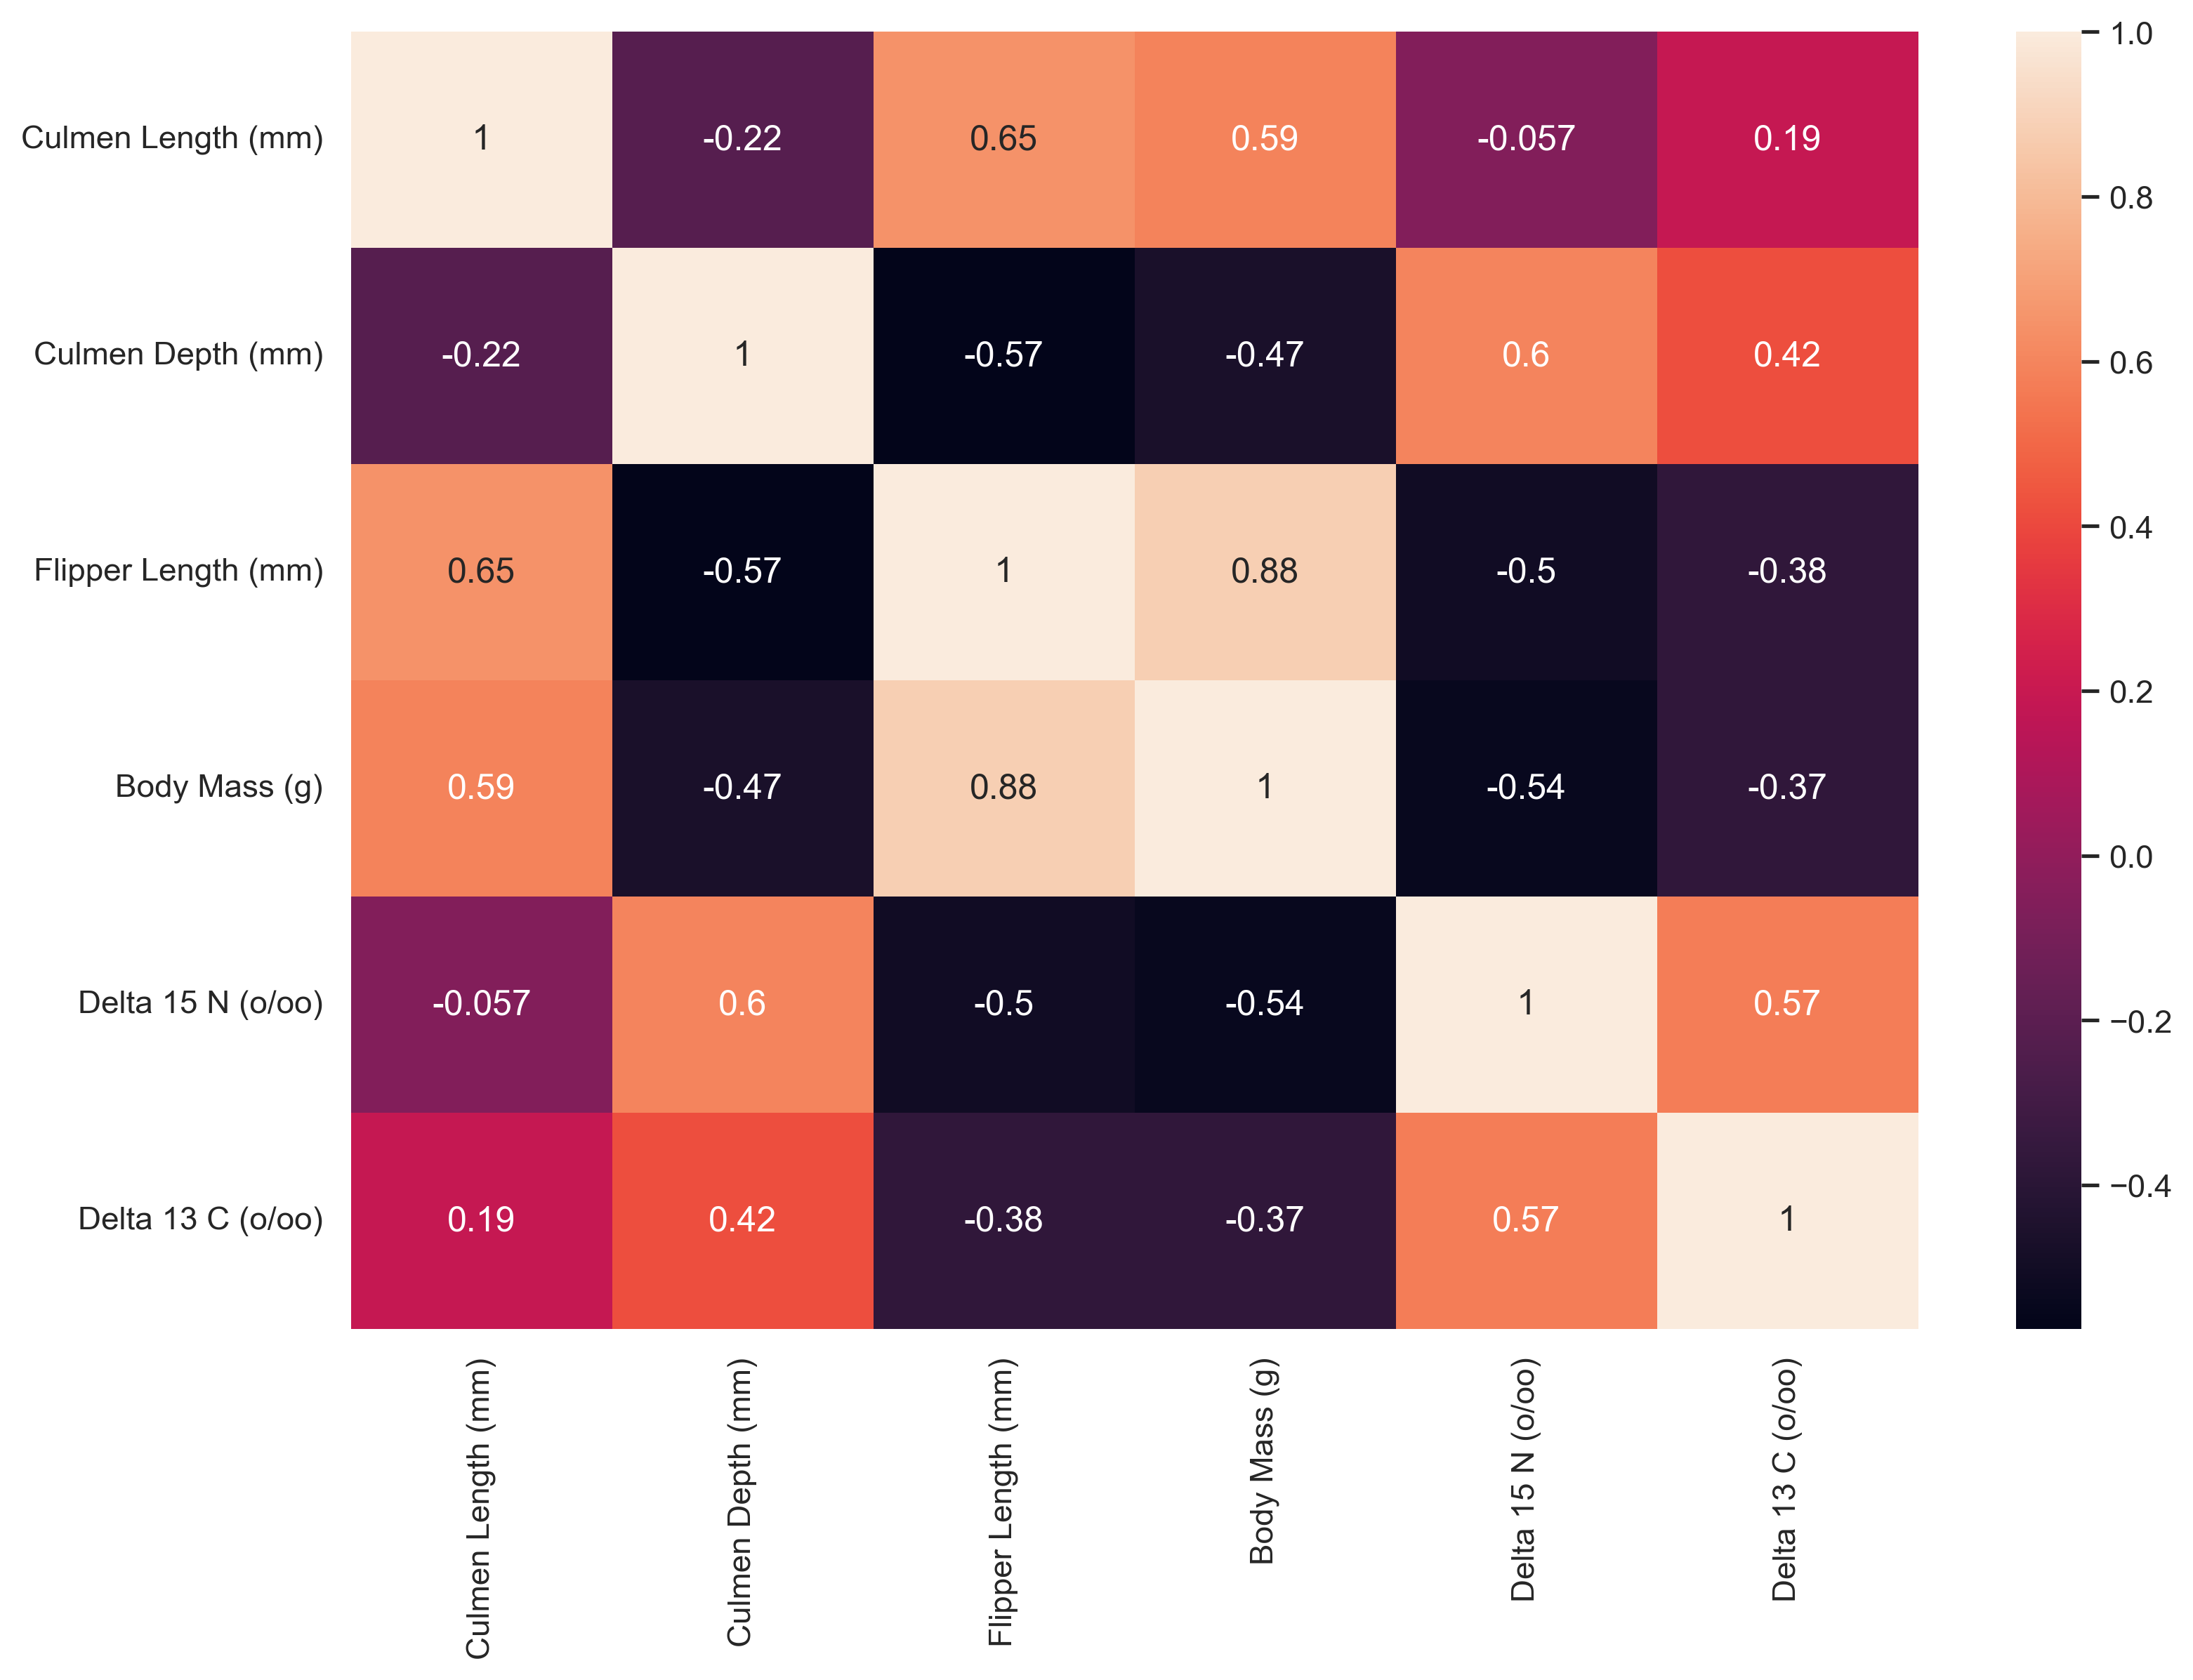

In [30]:
# heatmap to see the correlations between numerical variables
sns.heatmap(data.corr(), annot = True)

## Data Preprocessing

In [31]:
# change the categorical variables into numerical numbers
data['Sex'].replace(['MALE', 'FEMALE'],
                        [1, 0], inplace=True)
data['Clutch Completion'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)
data['Species'].replace(['Adelie Penguin (Pygoscelis adeliae)', 
                         'Chinstrap penguin (Pygoscelis antarctica)', 
                         'Gentoo penguin (Pygoscelis papua)'],
                        [0, 1, 2], inplace=True)

In [32]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()
transformed = ohe.fit_transform(data[['Island']])

data[ohe.categories_[0]] = transformed.toarray()

In [33]:
data = data.drop(columns = ['Island'])
data.head()

,Species,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Biscoe,Dream,Torgersen
1,0,1,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454,0.0,0.0,1.0
2,0,1,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302,0.0,0.0,1.0
4,0,1,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426,0.0,0.0,1.0
5,0,1,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805,0.0,0.0,1.0
6,0,0,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799,0.0,0.0,1.0


In [34]:
data.dtypes

Species                  int64
Clutch Completion        int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                      int64
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Biscoe                 float64
Dream                  float64
Torgersen              float64
dtype: object

## Random Forest

In [35]:
# standardlize the data
X = data.drop(columns = ['Species'])
X = (X - X.mean(axis=0))/X.std(axis=0)
Y = data['Species']

In [36]:
# Split train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Logistic Regression

In [39]:
# Create a multinomial logistic regression model
log_reg= LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model using the training data
log_reg.fit(X_train, Y_train)

# Predict the class labels for the test set
Y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


Performing Logistic regression, we got **1.0 accuracy**, which means our model perform well.

In [40]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
[[39  0  0]
 [ 0 19  0]
 [ 0  0 23]]


In [41]:
np.set_printoptions(precision = 3, suppress = True)

In [42]:
log_reg.coef_

array([[ 0.138, -1.757,  1.018, -0.721, -0.24 ,  0.476,  0.143, -0.7  ,
        -0.049, -0.166,  0.308],
       [-0.102,  1.353, -0.154, -0.055, -0.445, -0.396,  0.397,  1.097,
        -0.406,  0.58 , -0.226],
       [-0.035,  0.404, -0.864,  0.776,  0.685, -0.08 , -0.541, -0.397,
         0.455, -0.414, -0.081]])

1. We notice **Culmen Length, Culmen Depth, Flipper Length, Delta 13 C** have larger coefficient compared to the others, which means that these variables play the sinificant role in predciting Adelie Penguin
2. We notice **Culmen Length, Delta 13 C** have larger coefficient compared to the others, which means that these variables play the sinificant role in predciting Chinstrap Penguin
3. We notice **Culmen Depth, Flipper Length, Body Mass** have larger coefficient compared to the others, which means that these variables play the sinificant role in predciting Gentoo Penguin

In [43]:
# Print the classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        23

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



## K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Split train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [46]:
knc = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', algorithm = 'auto')

In [47]:
knc.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [49]:
Y_pred = knc.predict(X_test)

In [50]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## SVM

In [51]:
#Support Vector Machines
def hyperplane(P,x,z=0):
    """Given an SVC object P and an array of vectors x, computes the hyperplane wx+b=z"""
    alphas = P.dual_coef_
    svs = P.support_vectors_
    c = P.intercept_[0]-z
    a = np.sum(alphas.T*svs,axis=0)[0]
    b = np.sum(alphas.T*svs,axis=0)[1]
    return (-c-a*x)/b

def pts(P):
    """Given an SVC object P, returns the two closest points in the associated reduced convex hulls."""
    alphas = P.dual_coef_[0]
    svs = P.support_vectors_
    plus_indices = np.where(alphas>0)
    minus_indices = np.where(alphas<=0)
    alphas = alphas.reshape(-1,1)
    pluspt = np.sum(alphas[plus_indices]*svs[plus_indices],axis=0)/np.sum(alphas[plus_indices])
    minuspt = np.sum(alphas[minus_indices]*svs[minus_indices],axis=0)/np.sum(alphas[minus_indices])
    return pluspt, minuspt

### Using all the features

In [52]:
# Split train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [53]:
P = SVC(kernel='linear').fit(X_train, Y_train)

In [54]:
P.score(X_test, Y_test)

1.0

We got 1.0 accuracy.

### Using two features

In [55]:
X.head()

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Biscoe,Dream,Torgersen
1,0.341876,-0.830815,0.138524,-1.090078,-0.511525,-0.992311,0.379689,1.257082,-0.998456,-0.760721,2.552394
2,0.341876,-0.684847,0.443498,-0.445318,-1.191144,-0.992311,-0.673343,0.449739,-0.998456,-0.760721,2.552394
4,0.341876,-1.341705,1.104273,-0.588598,-0.944010,-0.992311,0.048120,0.460815,-0.998456,-0.760721,2.552394
5,0.341876,-0.867307,1.765049,-0.803518,-0.696876,1.004638,-0.135823,0.493957,-0.998456,-0.760721,2.552394
6,-2.916005,-0.940292,0.341840,-1.448278,-0.727768,-0.992311,0.810103,0.595191,-0.998456,-0.760721,2.552394


In [56]:
# choose two features to train SVM model
X2 = X[['Culmen Length (mm)', 'Flipper Length (mm)']]
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, random_state = 0)
P2 = SVC(kernel='linear', C=1000).fit(X_train, Y_train)
print('In-sample performance: Classifier yields accuracy of %f on train data.' % P2.score(X_train, Y_train))
print('Out-of-sample performance: Classifier yields accuracy of %f on test data.' % P2.score(X_test, Y_test))

In-sample performance: Classifier yields accuracy of 0.967078 on train data.
Out-of-sample performance: Classifier yields accuracy of 0.938272 on test data.


In [57]:
colors = ['red','blue','green']

In [58]:
red_vs_others = np.array([0 if x==0 else 1 for x in Y_train])
blue_vs_others = np.array([0 if x ==1 else 1 for x in Y_train])
green_vs_others = np.array([0 if x==2 else 1 for x in Y_train])

Pred = SVC(kernel='linear',C=1000).fit(X_train,red_vs_others)
Pgreen = SVC(kernel='linear',C=1000).fit(X_train,green_vs_others)
Pblue = SVC(kernel='linear',C=1000).fit(X_train,blue_vs_others)

In [59]:
f = figure(title='Train Data: Culmen Length (mm) vs Flipper Length (mm)',x_range=[-3,3],y_range=[-3,3],width=500,height=500)
f.scatter(x=X_train['Culmen Length (mm)'],y=X_train['Flipper Length (mm)'],color=[colors[i] for i in Y_train])

x=np.linspace(-3,3,100)

yred=hyperplane(Pred,x)
y0 = hyperplane(Pred,x,1)
y1 = hyperplane(Pred,x,-1)
f.line(x=x,y=yred,line_width=3,color='black',line_dash='dashed',legend_label='red vs others')
f.line(x=x,y=y0,line_width=1,alpha=.5,color='black',line_dash='dashed',legend_label='red vs others')
f.line(x=x,y=y1,line_width=1,alpha=.5,color='gray',line_dash='dashed',legend_label='red vs others')

yblue = hyperplane(Pblue,x)
y0 = hyperplane(Pblue,x,1)
y1 = hyperplane(Pblue,x,-1)
f.line(x=x,y=yblue,line_width=3,color='black',line_dash='dotted',legend_label='blue vs others')
f.line(x=x,y=y0,line_width=1,alpha=.5,color='black',line_dash='dotted',legend_label='blue vs others')
f.line(x=x,y=y1,line_width=1,alpha=.5,color='gray',line_dash='dotted',legend_label='blue vs others')

ygreen=hyperplane(Pgreen,x)
y0 = hyperplane(Pgreen,x,1)
y1 = hyperplane(Pgreen,x,-1)
f.line(x=x,y=ygreen,line_width=3,color='black',line_dash='dotdash',legend_label='green vs others')
f.line(x=x,y=y0,line_width=1,alpha=.5,color='black',line_dash='dotdash',legend_label='green vs others')
f.line(x=x,y=y1,line_width=1,alpha=.5,color='gray',line_dash='dotdash',legend_label='green vs others')

show(f)

In [60]:
P2.predict(X_test)
predicted_colors = [colors[i] for i in P2.predict(X_train)]

f=figure(title='Predicted classification on train data',x_range=[-3,3],y_range=[-3,3])
f.scatter(x=X_train['Culmen Length (mm)'],y=X_train['Flipper Length (mm)'],color=predicted_colors)

yred=hyperplane(Pred,x)
y0 = hyperplane(Pred,x,1)
y1 = hyperplane(Pred,x,-1)
f.line(x=x,y=yred,line_width=3,color='black',line_dash='dashed',legend_label='red vs others')
f.line(x=x,y=y0,line_width=1,alpha=.5,color='black',line_dash='dashed',legend_label='red vs others')
f.line(x=x,y=y1,line_width=1,alpha=.5,color='gray',line_dash='dashed',legend_label='red vs others')

yblue = hyperplane(Pblue,x)
y0 = hyperplane(Pblue,x,1)
y1 = hyperplane(Pblue,x,-1)
f.line(x=x,y=yblue,line_width=3,color='black',line_dash='dotted',legend_label='blue vs others')
f.line(x=x,y=y0,line_width=1,alpha=.5,color='black',line_dash='dotted',legend_label='blue vs others')
f.line(x=x,y=y1,line_width=1,alpha=.5,color='gray',line_dash='dotted',legend_label='blue vs others')

ygreen=hyperplane(Pgreen,x)
y0 = hyperplane(Pgreen,x,1)
y1 = hyperplane(Pgreen,x,-1)
f.line(x=x,y=ygreen,line_width=3,color='black',line_dash='dotdash',legend_label='green vs others')
f.line(x=x,y=y0,line_width=1,alpha=.5,color='black',line_dash='dotdash',legend_label='green vs others')
f.line(x=x,y=y1,line_width=1,alpha=.5,color='gray',line_dash='dotdash',legend_label='green vs others')

show(f)

### Using the features without Sex, Delta 15 N, Delta 13 C

We notice that we need the blood sample for a penguin if we want to detect Sex, Delta 15 N, Delta 13 C. In practice, it is hard for us to get blood sample for each penguin. We are curious about knowing what kind of penguin it was without having the blood sample. So, we remove **Sex, Delta 15 N, Delta 13 C** to perform SVM.

In [61]:
X3 = X.drop(columns=['Sex','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])
X3

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Biscoe,Dream,Torgersen
1,0.341876,-0.830815,0.138524,-1.090078,-0.511525,-0.998456,-0.760721,2.552394
2,0.341876,-0.684847,0.443498,-0.445318,-1.191144,-0.998456,-0.760721,2.552394
4,0.341876,-1.341705,1.104273,-0.588598,-0.944010,-0.998456,-0.760721,2.552394
5,0.341876,-0.867307,1.765049,-0.803518,-0.696876,-0.998456,-0.760721,2.552394
6,-2.916005,-0.940292,0.341840,-1.448278,-0.727768,-0.998456,-0.760721,2.552394
...,...,...,...,...,...,...,...,...
338,-2.916005,0.574131,-1.742144,0.915842,0.878603,0.998456,-0.760721,-0.390580
340,0.341876,0.501147,-1.437171,0.987482,0.785928,0.998456,-0.760721,-0.390580
341,0.341876,1.158005,-0.725567,1.488962,1.898031,0.998456,-0.760721,-0.390580
342,0.341876,0.209210,-1.183027,0.772562,1.218413,0.998456,-0.760721,-0.390580


In [62]:
# Split train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, random_state = 0)

In [63]:
P = SVC(kernel='linear').fit(X_train, Y_train)

In [64]:
P.score(X_test, Y_test)

0.9876543209876543

We got **0.9876** accuracy, which shows the model perform well. But it also shows that these three features that we need to know if we want to be able to accurately predict penguin types.

In [65]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, P.predict(X_test)))

Confusion Matrix:
[[39  0  0]
 [ 1 18  0]
 [ 0  0 23]]


### Using PCA

In [66]:
# Split train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
PC = pca.fit_transform(X_train)
PC_test = pca.transform(X_test)

In [68]:
pca.explained_variance_

array([4.714, 2.047, 1.229, 1.008, 0.681])

In [82]:
print(pca.explained_variance_ratio_)
print("5 dimensions from PCA provided", sum(pca.explained_variance_ratio_),"of cumulative data variance.")

[0.43  0.187 0.112 0.092 0.062]
5 dimensions from PCA provided 0.8829469447092677 of cumulative data variance.


In [70]:
scatter_plot=figure(title='sklearn version')
scatter_plot.scatter(x=PC[:,0],y=PC[:,1])
show(scatter_plot)

In [71]:
P = SVC(kernel='linear').fit(PC, Y_train)

In [72]:
P.score(PC_test, Y_test)

1.0

### Predicting the species and sex of penguin

In [73]:
def T_S(row):
    if row["Species"] == 0 and row["Sex"] == 1 :
        return 0
    elif row["Species"] == 0 and row["Sex"] == 0 :
        return 1
    elif row["Species"] == 1 and row["Sex"] == 1 :
        return 2
    elif row["Species"] == 1 and row["Sex"] == 0 :
        return 3
    elif row["Species"] == 2 and row["Sex"] == 1 :
        return 4
    elif row["Species"] == 2 and row["Sex"] == 0 :
        return 5

data1 = data.assign(Type_Sex=data.apply(T_S, axis=1))

In [74]:
data1

,Species,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Biscoe,Dream,Torgersen,Type_Sex
1,0,1,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454,0.0,0.0,1.0,1
2,0,1,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302,0.0,0.0,1.0,1
4,0,1,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426,0.0,0.0,1.0,1
5,0,1,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805,0.0,0.0,1.0,0
6,0,0,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0,7.99184,-26.20538,1.0,0.0,0.0,5
340,2,1,46.8,14.3,215.0,4850.0,0,8.41151,-26.13832,1.0,0.0,0.0,5
341,2,1,50.4,15.7,222.0,5750.0,1,8.30166,-26.04117,1.0,0.0,0.0,4
342,2,1,45.2,14.8,212.0,5200.0,0,8.24246,-26.11969,1.0,0.0,0.0,5


In [75]:
# standardlize the data
X4 = data1.drop(columns = ['Species','Sex','Type_Sex'])
X4 = (X4 - X4.mean(axis=0))/X4.std(axis=0)
Y1 = data1['Type_Sex']

In [76]:
# Split train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y1, random_state = 0)

In [77]:
# Cross_validation to find the best hyperparameter
from sklearn.model_selection import GridSearchCV

params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': [.1,.3,.5,1,3,6,11,13]}

clf = GridSearchCV(SVC(), params, cv = 10, scoring='accuracy')
clf.fit(X_train, Y_train)

print('Best params: ', clf.best_params_)
print('Best score: ', clf.best_score_)

best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test, Y_test))

Best params:  {'C': 0.3, 'kernel': 'linear'}
Best score:  0.9385
Accuracy on test set:  0.8395061728395061


In [78]:
# Print the confusion matrix
Y_pred = best_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
[[17  6  0  1  0  0]
 [ 1 14  0  0  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0  1  6  0  0]
 [ 0  0  0  0  9  1]
 [ 0  0  0  0  1 12]]


| Index for **Type_Sex**    | Meaning |
| -------- | ------- |
| 0  | Male Adelie    |
| 1 | Female Adelie     |
| 2    | Male Chinstrap    |
| 3  | Female Chinstrap    |
| 4 | Male Gentoo     |
| 5    | Female Gentoo    |

From the confustion matrix, we can notice that it is more likely to predict wrong sex bewteen the same type of penguin, especially for Adelie penguin.

## Neural Network

We try to use Neural Network to predict the species and sex of penguin.

In [79]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,), alpha=0.1, max_iter=1000, random_state=0)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
acc = sum(sum([Y_pred == Y_test]))/len(Y_pred)
acc

0.9259259259259259

The accuracy is **0.9259**, which is higher than SVM. So, the neural network have bettter performace. 

## Conclusion

Overall, we used 4 models to predict the species of penguin, which all show **1.0** accuracy. The amazing result reflect the high quality of the dataset. We cannot distinguish which method is better to predict the species of penguin. 

Then, we used the SVM method to establish a model for predicting penguin species in situations where blood samples are not obtainable. 

Finally, we used the SVM method and Neural Network to predict the species and sex of penguin. Compared to SVM Method, Netural Netwrok have better performance.



Based on the analysis, many features stand out as distinct enough to distinguish the penguin species, such as **Culmen Length, Culmen Depth, Delta 13 C, Flipper Length, and Body Mass**. 

| Feature    | Coefficient of Adelie | Coefficient of Chinstrap | Coefficient of Gentoo |
| -------- | ------- | ------- | ------- |
| Culmen Length | -1.757     | 1.353     | 0.404     |
| Culmen Depth    | 1.018    | -0.154    | -0.864    |
| Flipper Length  | -0.721    | -0.055    | 0.776    |
| Body Mass  | -0.24    | -0.445   | 0.685    |
| Delta 13 C | -0.7     | 1.097     | -0.397     |

According to logistic regression coefficient, we can conclude:
1. if Culmen Length is smaller, this penguin is more likely to be Adelie
2. if Culmen Depth is bigger, this penguin is more likely to be Adelie and less likely to be Gentoo
3. if Flipper Length is smaller, this penguin is more likely to be Adelie and less likely to be Gentoo
4. if Body Mass is bigger, this penguin is more likely to be Gentoo
5. if Delta 13 C is bigger, this penguin is more likely to be Chinstrap

**For Adelie Penguin, it has the smaller Culmen Length, bigger Culmen Depth, and smaller Flipper Length. The Gentoo Penguin is opposite. However, if we don't have blood sample, it is hard for us to distinguish Chinstrap Penguin.**

In this class, we learn many ML algorithm. During the real project, we should try several algorithms for one dataset and find the most effective one. Thanks for the help from professor J